**Uploading Kaggle API Key**

In [1]:
import torch

if torch.cuda.is_available():
    DEVICE = torch.device("cuda:0")
    print("Found GPU")
else:
    torch.device("cpu")

print("Pytorch version:", torch.__version__)

Found GPU
Pytorch version: 2.9.0+cu126


In [2]:
from google.colab import files
files.upload()   # upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urja2007","key":"0b43659003cd96e7f480e7504df8a523"}'}

In [3]:
!mkdir -p ~/.kaggle  #creates a hidden folder called .kaggle inside your home directory (~).
!cp kaggle.json ~/.kaggle/ #Copies your kaggle.json file (API key you downloaded from Kaggle website) into the .kaggle folder.
!chmod 600 ~/.kaggle/kaggle.json #changes file permissions so that only you (the owner) can read & write the file.


**Download Dataset**

In [4]:
#download a ZIP file named eurosat-dataset.zip into your Colab working directory.
!kaggle datasets download -d apollo2506/eurosat-dataset


Dataset URL: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset
License(s): CC0-1.0
 99% 2.03G/2.04G [00:15<00:00, 109MB/s] 
100% 2.04G/2.04G [00:15<00:00, 138MB/s]


**Unzipping the Dataset**

In [5]:
#Unzip and dataset will be extracted inside a folder called eurosat_data/.
!unzip eurosat-dataset.zip -d eurosat_data

Streaming output truncated to the last 5000 lines.
  inflating: eurosat_data/EuroSATallBands/River/River_1990.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1991.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1992.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1993.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1994.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1995.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1996.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1997.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1998.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_1999.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_2.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_20.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_200.tif  
  inflating: eurosat_data/EuroSATallBands/River/River_2000.tif  
  inflating: eurosat_data/EuroSATallBands/Riv

**Exploring the Dataset Structure**

In [6]:
import os

# Check top-level directories
print(os.listdir("eurosat_data")) #lists all subfolders inside eurosat_data.(10)


['EuroSATallBands', 'EuroSAT']


In [7]:
os.listdir("eurosat_data/EuroSAT")

['River',
 'AnnualCrop',
 'test.csv',
 'Industrial',
 'validation.csv',
 'Highway',
 'Pasture',
 'train.csv',
 'Forest',
 'HerbaceousVegetation',
 'SeaLake',
 'PermanentCrop',
 'Residential',
 'label_map.json']

In [8]:
os.listdir("eurosat_data/EuroSATallBands")

['River',
 'AnnualCrop',
 'test.csv',
 'Industrial',
 'validation.csv',
 'Highway',
 'Pasture',
 'train.csv',
 'Forest',
 'HerbaceousVegetation',
 'SeaLake',
 'PermanentCrop',
 'Residential',
 'label_map.json']

In [9]:
# Count total images
import glob
all_images = glob.glob("eurosat_data/**/*.jpg", recursive=True) #finds all .jpg files inside the dataset, no matter how deep in the folder structure
print("Total images:", len(all_images)) #gives the total number of images in the dataset.

Total images: 27000


In [10]:
all_images_in_EuroSAT = all_images = glob.glob("eurosat_data/EuroSAT/**/*.jpg", recursive=True)
all_images_in_EuroSAT

['eurosat_data/EuroSAT/River/River_2457.jpg',
 'eurosat_data/EuroSAT/River/River_2307.jpg',
 'eurosat_data/EuroSAT/River/River_1618.jpg',
 'eurosat_data/EuroSAT/River/River_1572.jpg',
 'eurosat_data/EuroSAT/River/River_395.jpg',
 'eurosat_data/EuroSAT/River/River_2049.jpg',
 'eurosat_data/EuroSAT/River/River_1084.jpg',
 'eurosat_data/EuroSAT/River/River_1396.jpg',
 'eurosat_data/EuroSAT/River/River_364.jpg',
 'eurosat_data/EuroSAT/River/River_1730.jpg',
 'eurosat_data/EuroSAT/River/River_1473.jpg',
 'eurosat_data/EuroSAT/River/River_1866.jpg',
 'eurosat_data/EuroSAT/River/River_108.jpg',
 'eurosat_data/EuroSAT/River/River_2117.jpg',
 'eurosat_data/EuroSAT/River/River_253.jpg',
 'eurosat_data/EuroSAT/River/River_59.jpg',
 'eurosat_data/EuroSAT/River/River_2113.jpg',
 'eurosat_data/EuroSAT/River/River_2376.jpg',
 'eurosat_data/EuroSAT/River/River_1605.jpg',
 'eurosat_data/EuroSAT/River/River_859.jpg',
 'eurosat_data/EuroSAT/River/River_1132.jpg',
 'eurosat_data/EuroSAT/River/River_490.jp

In [11]:
len(all_images_in_EuroSAT)

27000

In [12]:
all_images_in_EuroSATallBands = glob.glob("eurosat_data/EuroSATallBands/**/*.jpg", recursive=True)
all_images_in_EuroSATallBands

[]

In [13]:
len(all_images_in_EuroSATallBands)

0

In [14]:
images_in_EuroSATallBands =  glob.glob("eurosat_data/EuroSATallBands/**/*.tif", recursive=True)
images_in_EuroSATallBands

['eurosat_data/EuroSATallBands/River/River_485.tif',
 'eurosat_data/EuroSATallBands/River/River_768.tif',
 'eurosat_data/EuroSATallBands/River/River_2349.tif',
 'eurosat_data/EuroSATallBands/River/River_1611.tif',
 'eurosat_data/EuroSATallBands/River/River_2352.tif',
 'eurosat_data/EuroSATallBands/River/River_2356.tif',
 'eurosat_data/EuroSATallBands/River/River_654.tif',
 'eurosat_data/EuroSATallBands/River/River_272.tif',
 'eurosat_data/EuroSATallBands/River/River_1283.tif',
 'eurosat_data/EuroSATallBands/River/River_1281.tif',
 'eurosat_data/EuroSATallBands/River/River_1839.tif',
 'eurosat_data/EuroSATallBands/River/River_2264.tif',
 'eurosat_data/EuroSATallBands/River/River_2291.tif',
 'eurosat_data/EuroSATallBands/River/River_2346.tif',
 'eurosat_data/EuroSATallBands/River/River_49.tif',
 'eurosat_data/EuroSATallBands/River/River_661.tif',
 'eurosat_data/EuroSATallBands/River/River_841.tif',
 'eurosat_data/EuroSATallBands/River/River_1250.tif',
 'eurosat_data/EuroSATallBands/River

In [15]:
len(images_in_EuroSATallBands)

27597

In [16]:
for folder in sorted(os.listdir("eurosat_data/EuroSAT")):
    class_path = os.path.join("eurosat_data/EuroSAT", folder)
    if os.path.isdir(class_path):
        print(f"{folder:20} -> {len(os.listdir(class_path))} images")


AnnualCrop           -> 3000 images
Forest               -> 3000 images
HerbaceousVegetation -> 3000 images
Highway              -> 2500 images
Industrial           -> 2500 images
Pasture              -> 2000 images
PermanentCrop        -> 2500 images
Residential          -> 3000 images
River                -> 2500 images
SeaLake              -> 3000 images


In [17]:
for folder in sorted(os.listdir("eurosat_data/EuroSATallBands")):
    class_path = os.path.join("eurosat_data/EuroSATallBands", folder)
    if os.path.isdir(class_path):
        print(f"{folder:20} -> {len(os.listdir(class_path))} images")


AnnualCrop           -> 3000 images
Forest               -> 3000 images
HerbaceousVegetation -> 3000 images
Highway              -> 2500 images
Industrial           -> 2500 images
Pasture              -> 2000 images
PermanentCrop        -> 2500 images
Residential          -> 3000 images
River                -> 2500 images
SeaLake              -> 3597 images


**Dataset Splitting ( training, validation, and testing set)**

**Visualizing Sample Images**

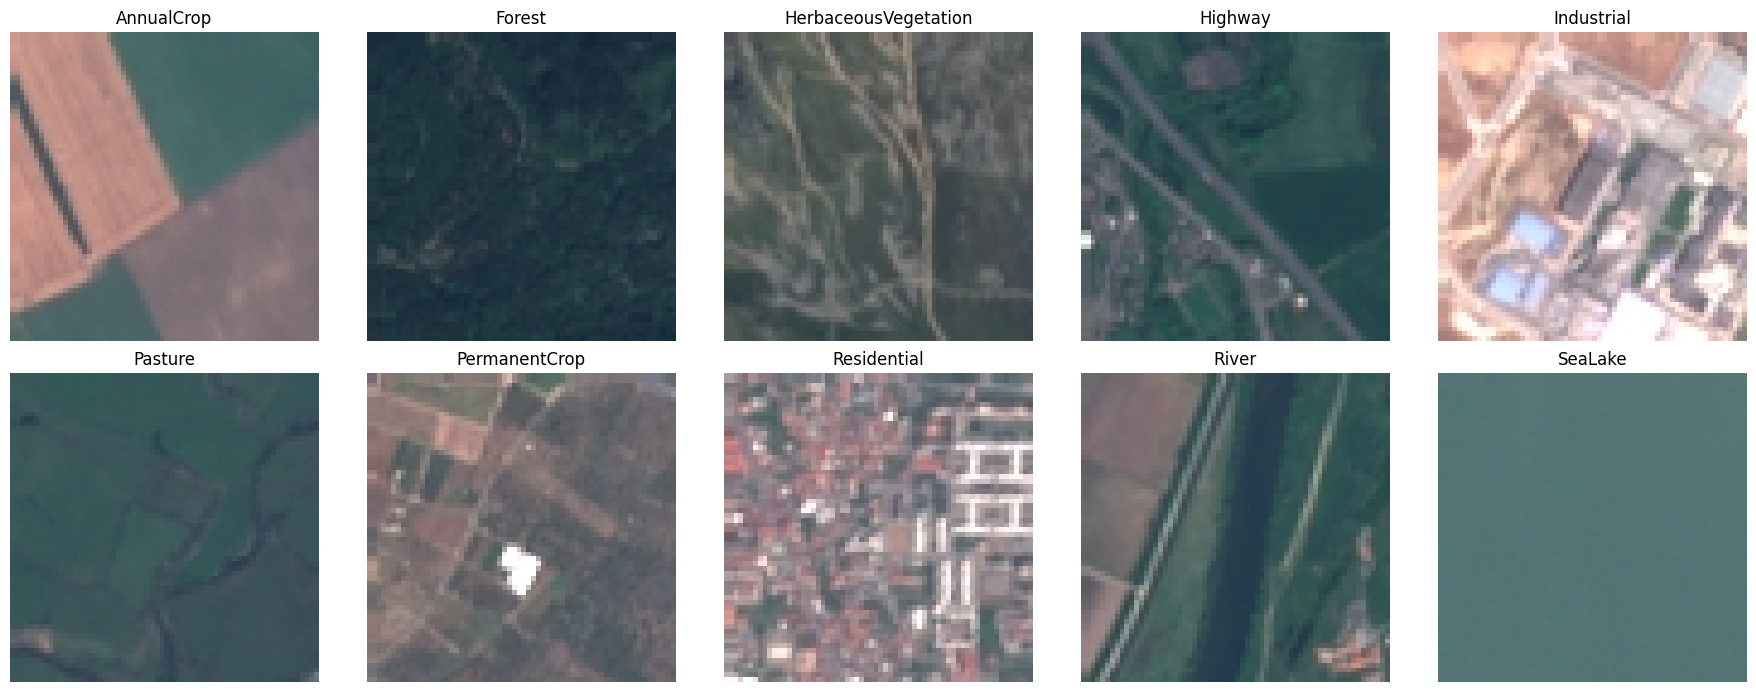

In [18]:
import os
import matplotlib.pyplot as plt
from PIL import Image

RGB_ROOT = "/content/eurosat_data/EuroSAT"
all_items = sorted(os.listdir(RGB_ROOT))
classes = [item for item in all_items if os.path.isdir(os.path.join(RGB_ROOT, item))]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for idx, cls in enumerate(classes):
    class_path = os.path.join(RGB_ROOT, cls)
    img_name = os.listdir(class_path)[0]  # first image
    img = Image.open(os.path.join(class_path, img_name))
    axes[idx].imshow(img)
    axes[idx].set_title(cls)
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

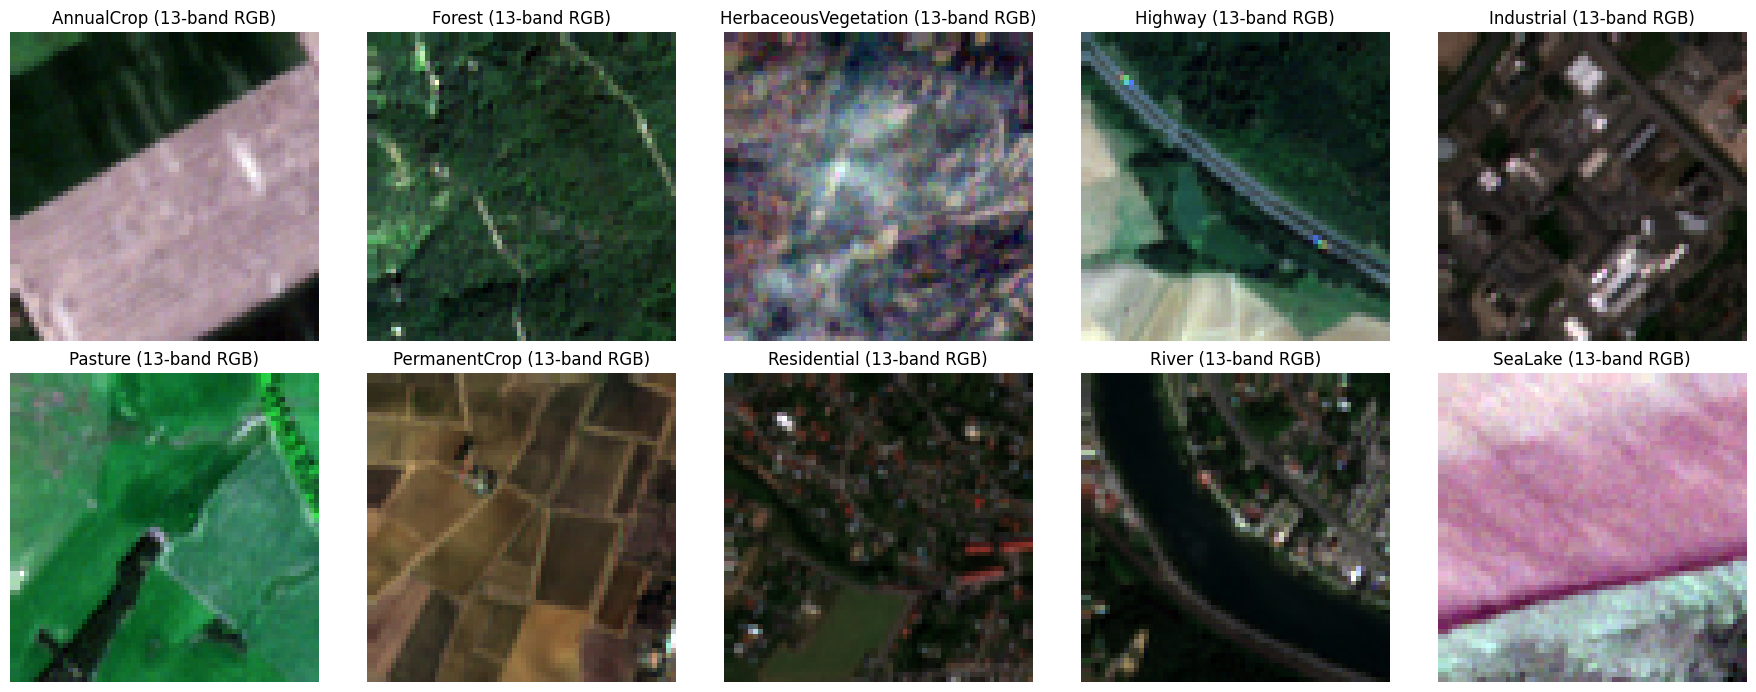

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio # Import rasterio for .tif files

ALLBANDS_ROOT = "/content/eurosat_data/EuroSATallBands"
all_items = sorted(os.listdir(ALLBANDS_ROOT))
classes = [item for item in all_items if os.path.isdir(os.path.join(ALLBANDS_ROOT, item))]

def normalize(x):
    x = (x - x.min()) / (x.max() - x.min() + 1e-6)
    return x

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for idx, cls in enumerate(classes):
    class_path = os.path.join(ALLBANDS_ROOT, cls)

    # Filter for .tif files only
    tif_files = [f for f in os.listdir(class_path) if f.endswith('.tif')]
    arr_name = tif_files[0]  # first .tif file

    # Use rasterio to open .tif files
    with rasterio.open(os.path.join(class_path, arr_name)) as src:
        arr = src.read() # shape: (13, 64, 64)

    # Transpose to (H, W, C) for matplotlib imshow
    arr = arr.transpose(1, 2, 0)

    # RGB visualization using B04, B03, B02 (indices 3, 2, 1 if 0-indexed)
    R = normalize(arr[:, :, 3])
    G = normalize(arr[:, :, 2])
    B = normalize(arr[:, :, 1])
    rgb = np.stack([R, G, B], axis=-1)

    axes[idx].imshow(rgb)
    axes[idx].set_title(f"{cls} (13-band RGB)")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

In [20]:
RGB_ROOT = "/content/eurosat_data/EuroSAT"
ALLBANDS_ROOT = "/content/eurosat_data/EuroSATallBands"

# 10 EuroSAT classes
CLASSES = [
    "AnnualCrop", "Forest", "HerbaceousVegetation", "Highway",
    "Industrial", "Pasture", "PermanentCrop", "Residential",
    "River", "SeaLake"
]

band_names = [
    "B01 - Coastal", "B02 - Blue", "B03 - Green", "B04 - Red",
    "B05 - RE1", "B06 - RE2", "B07 - RE3", "B08 - NIR",
    "B08A - NIR Narrow", "B09 - WV", "B11 - SWIR1",
    "B12 - SWIR2", "B10 - Cirrus"
]

def normalize(x):
    return (x - x.min()) / (x.max() - x.min() + 1e-6)



=== AnnualCrop ===


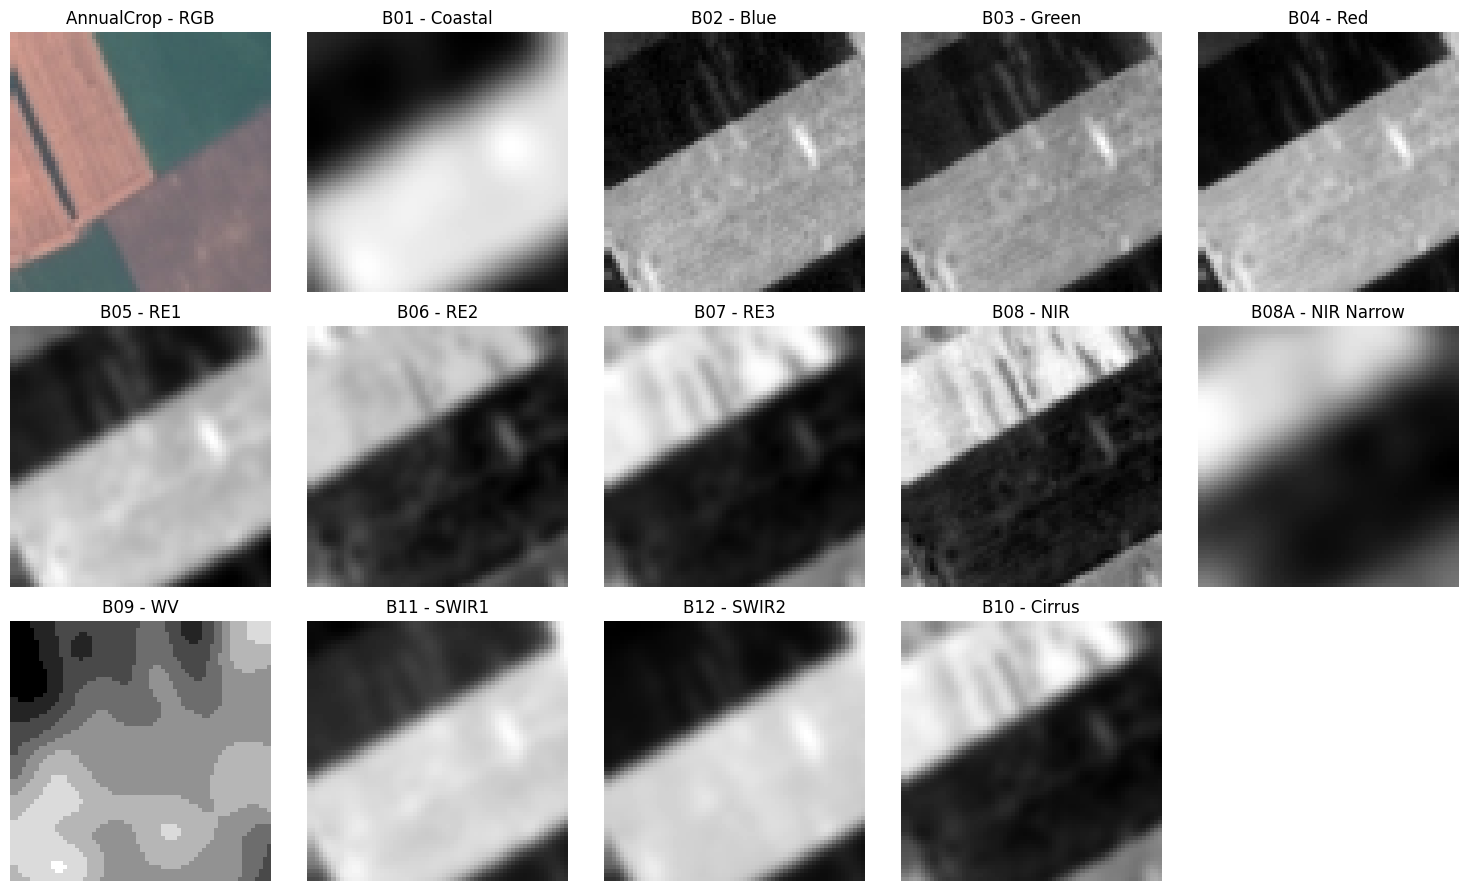


=== Forest ===


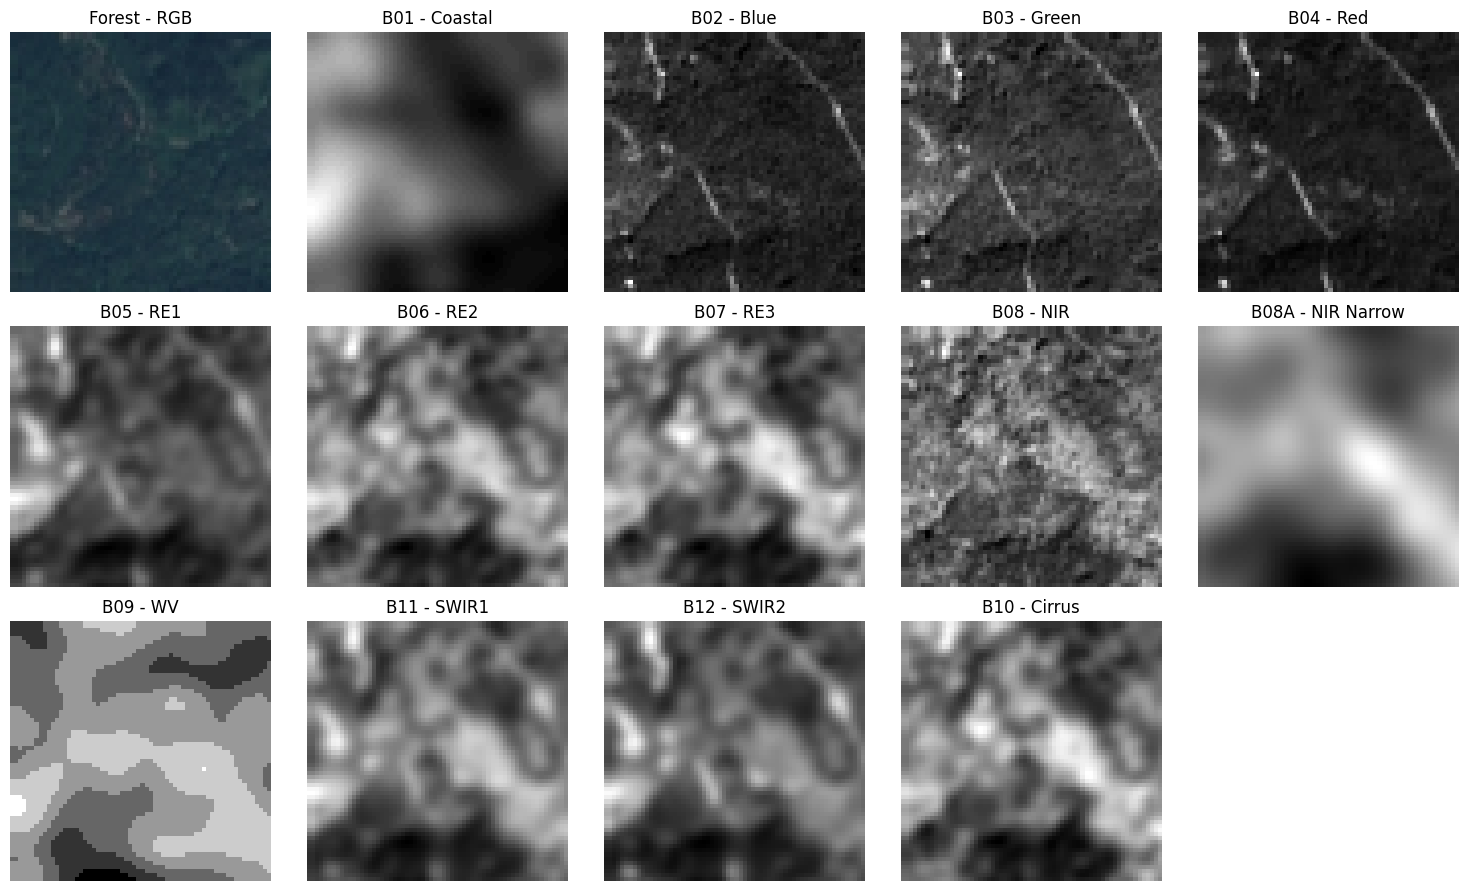


=== HerbaceousVegetation ===


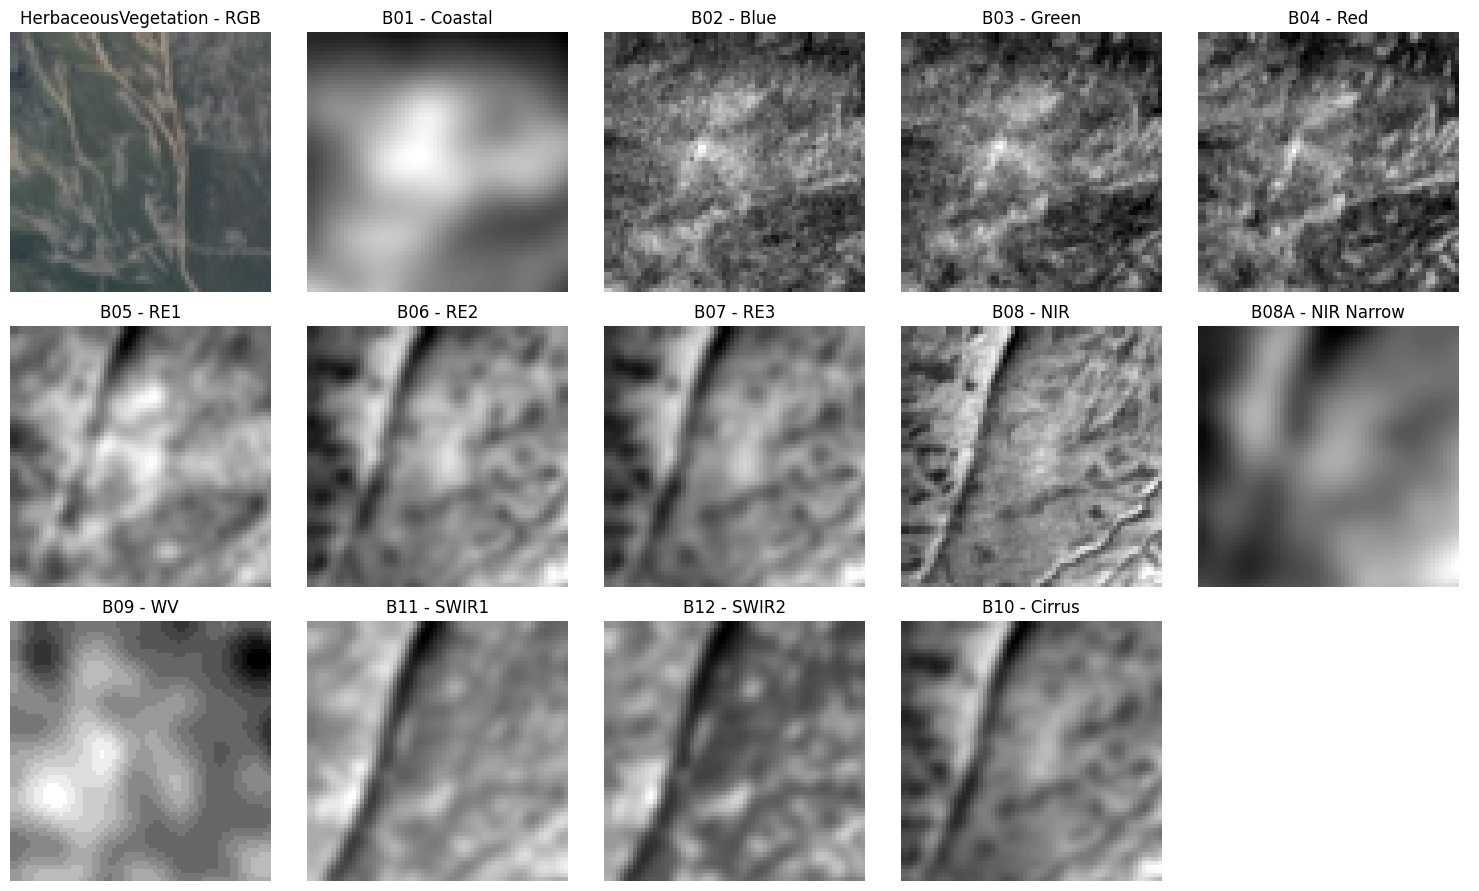


=== Highway ===


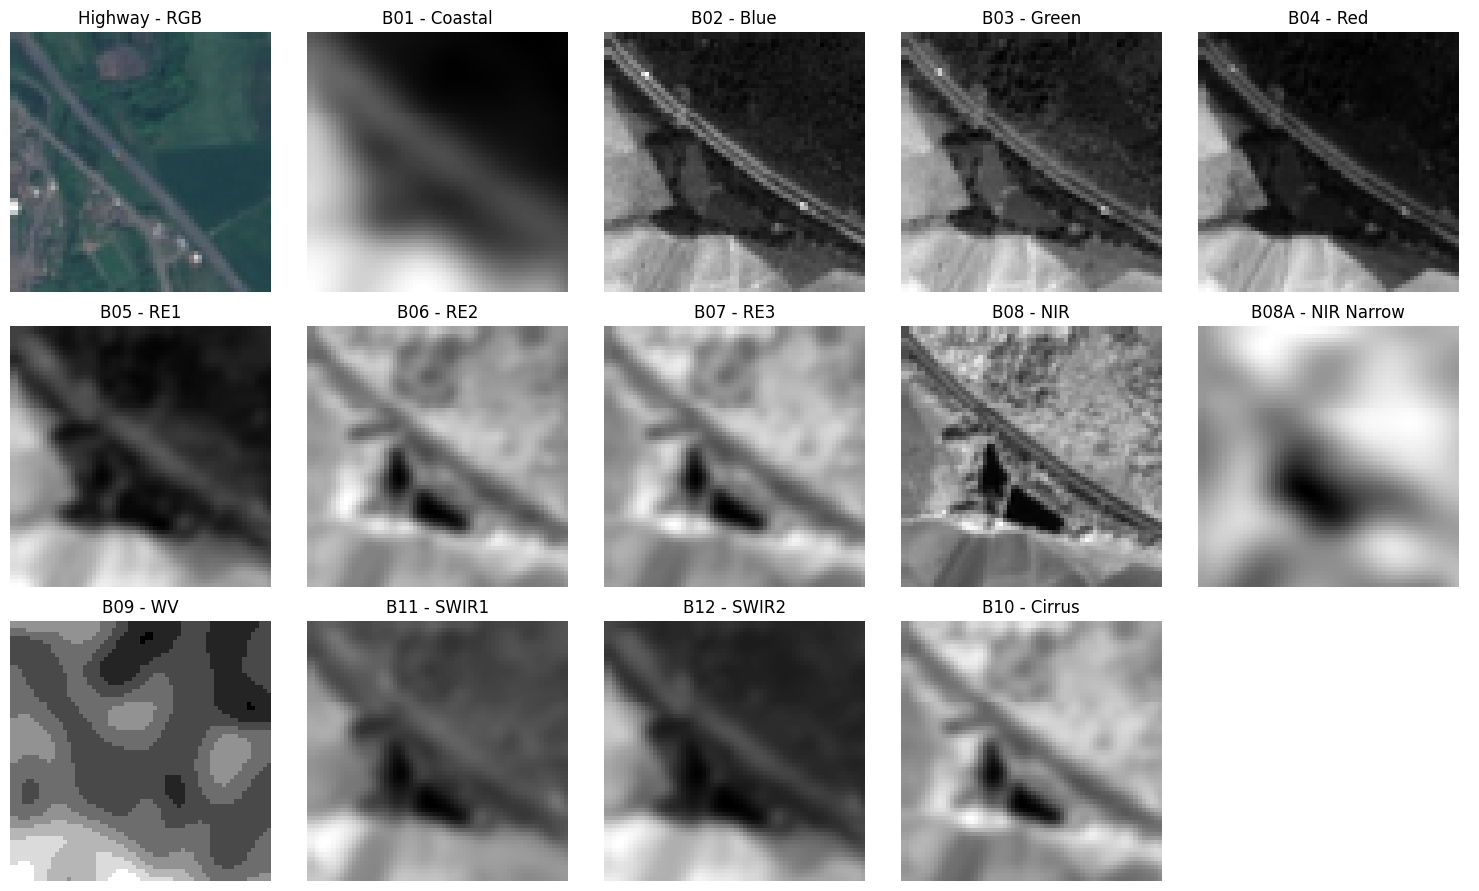


=== Industrial ===


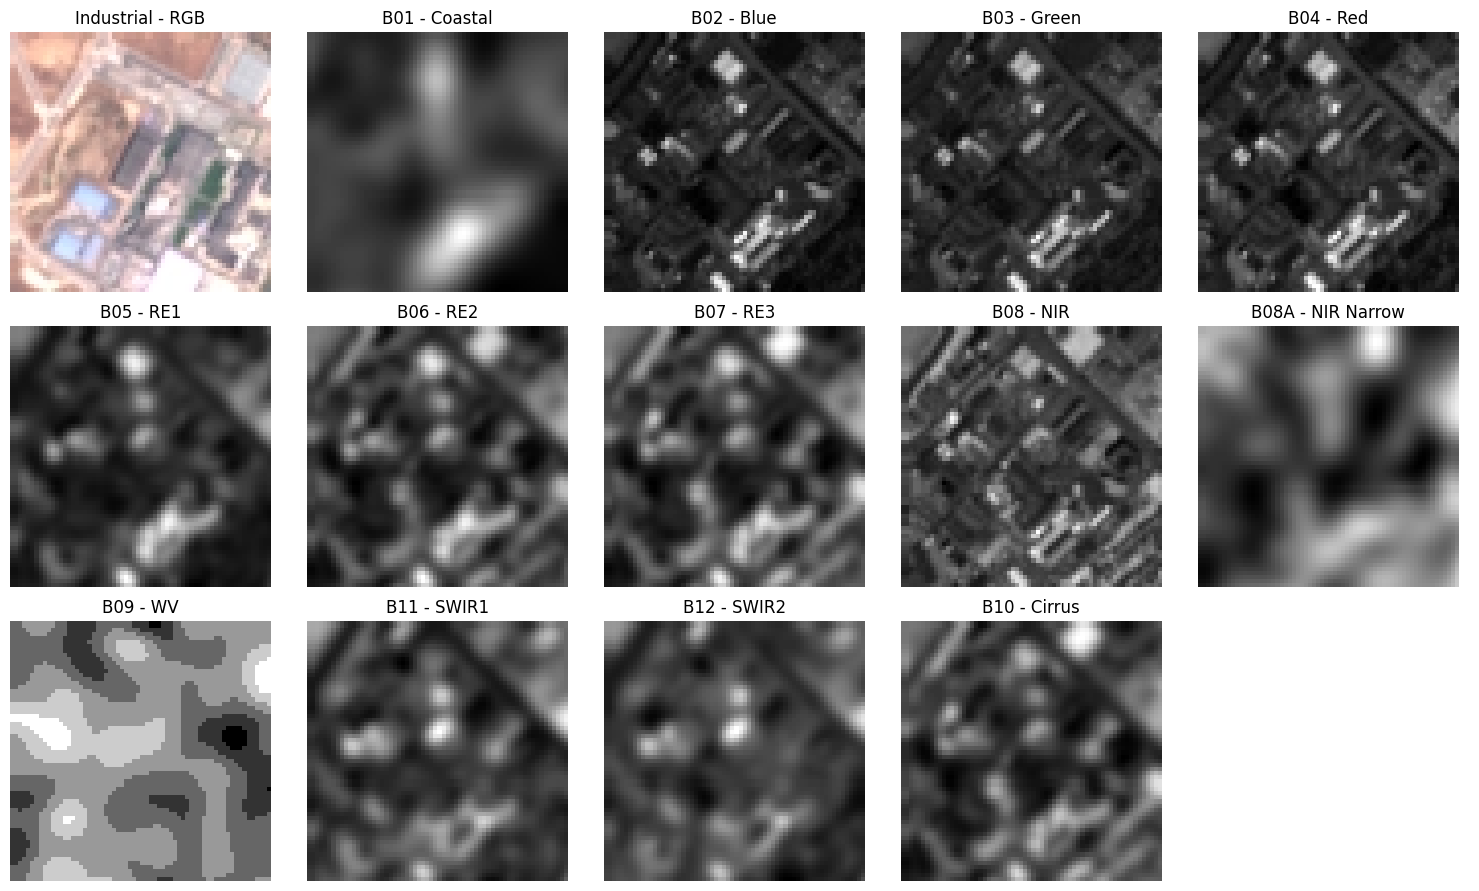


=== Pasture ===


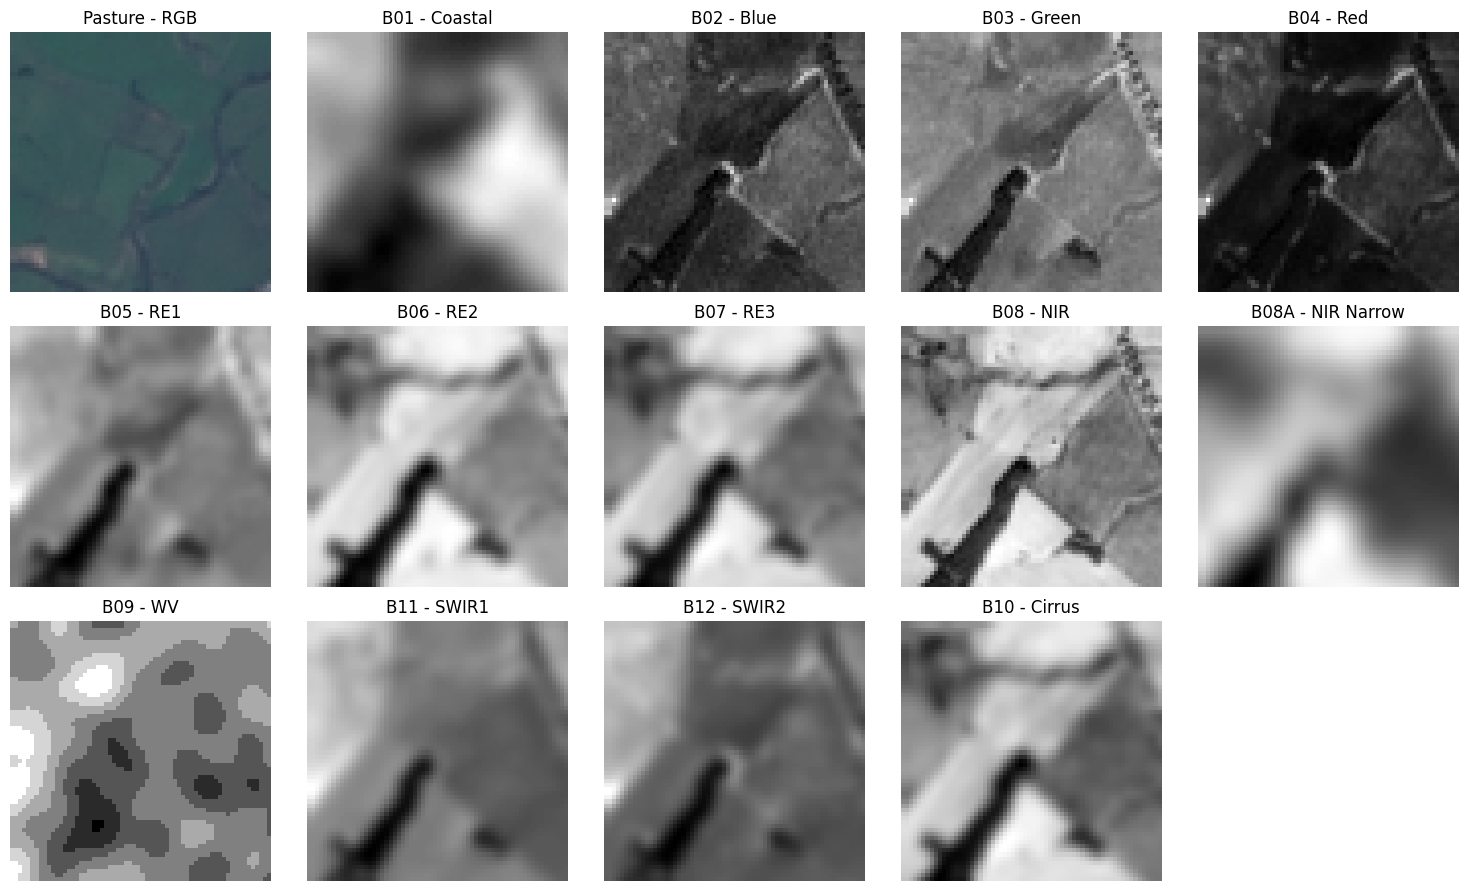


=== PermanentCrop ===


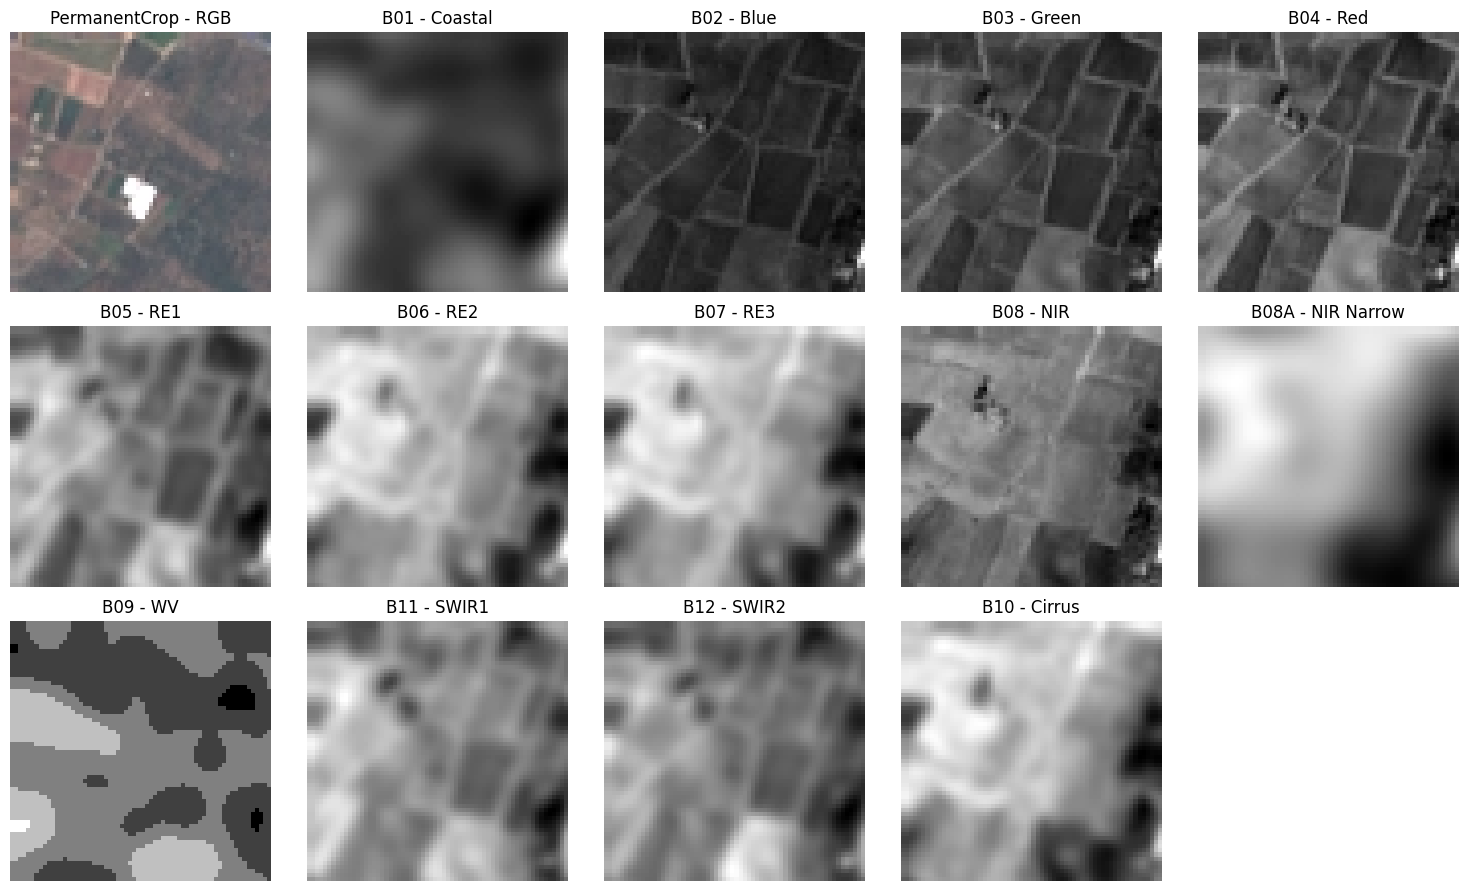


=== Residential ===


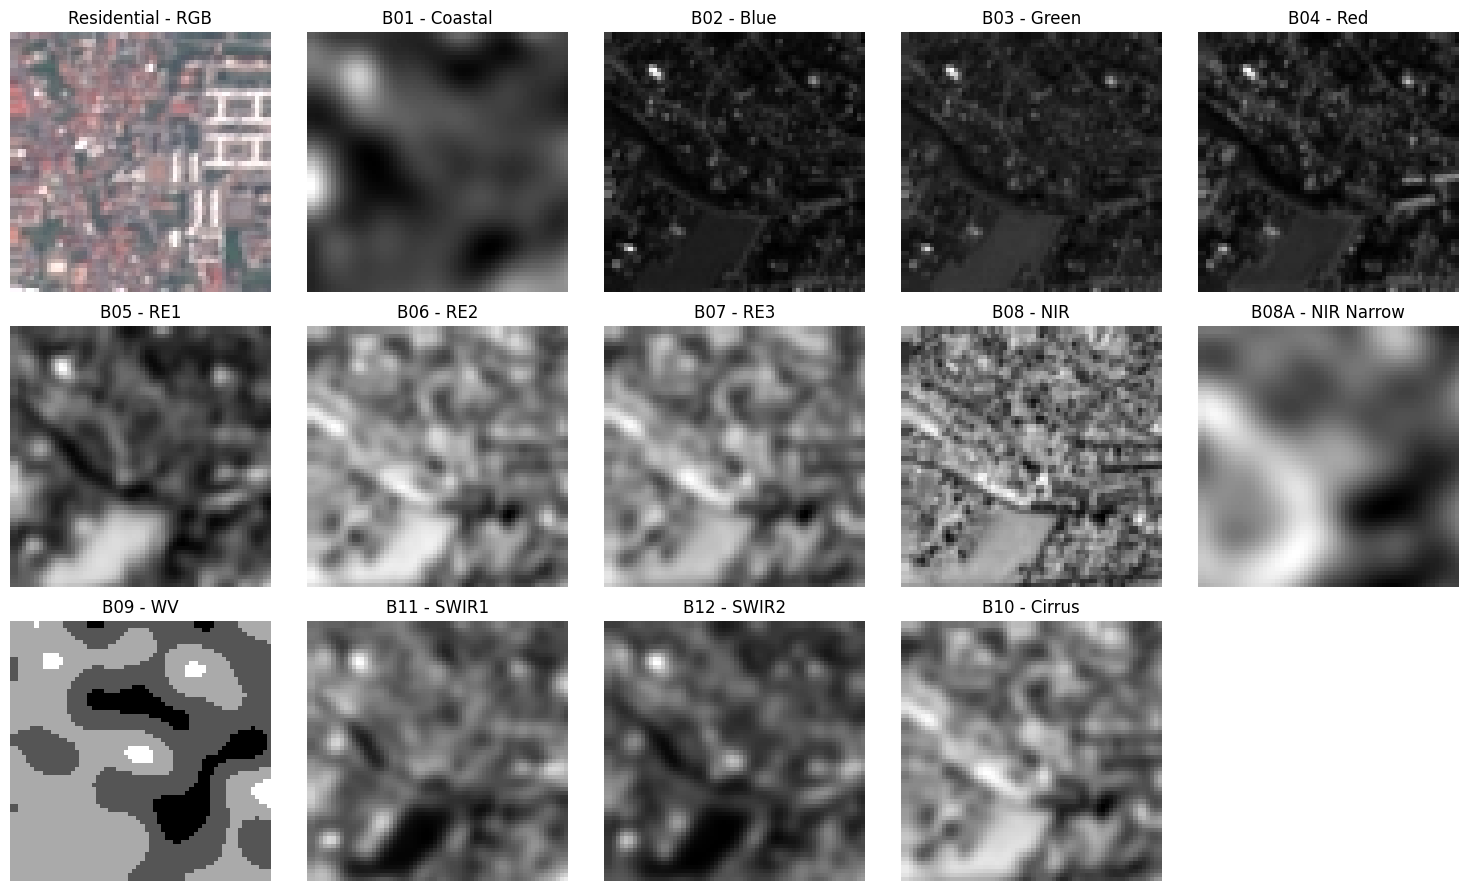


=== River ===


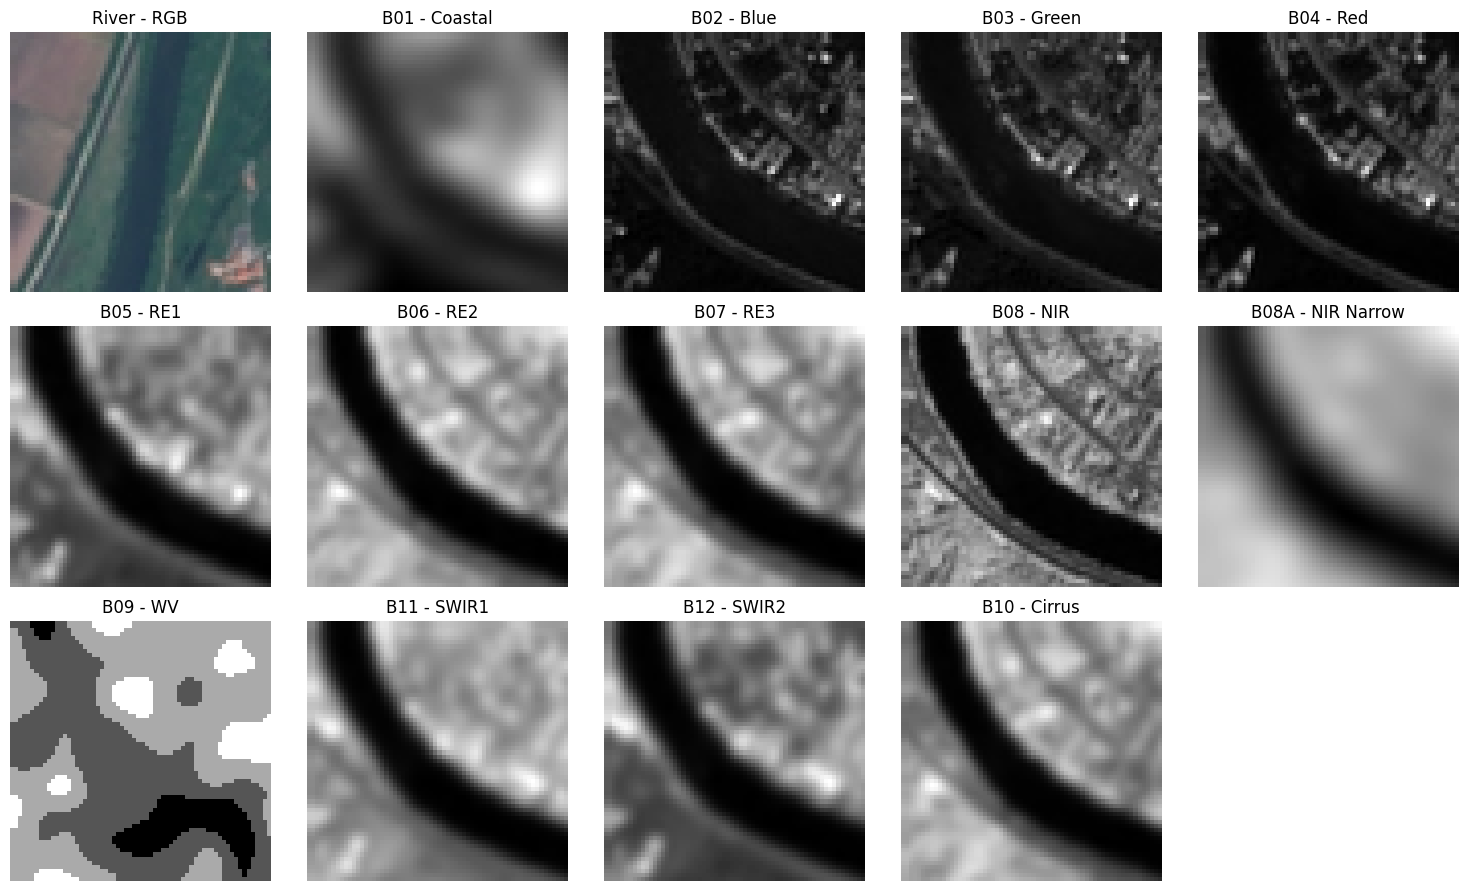


=== SeaLake ===


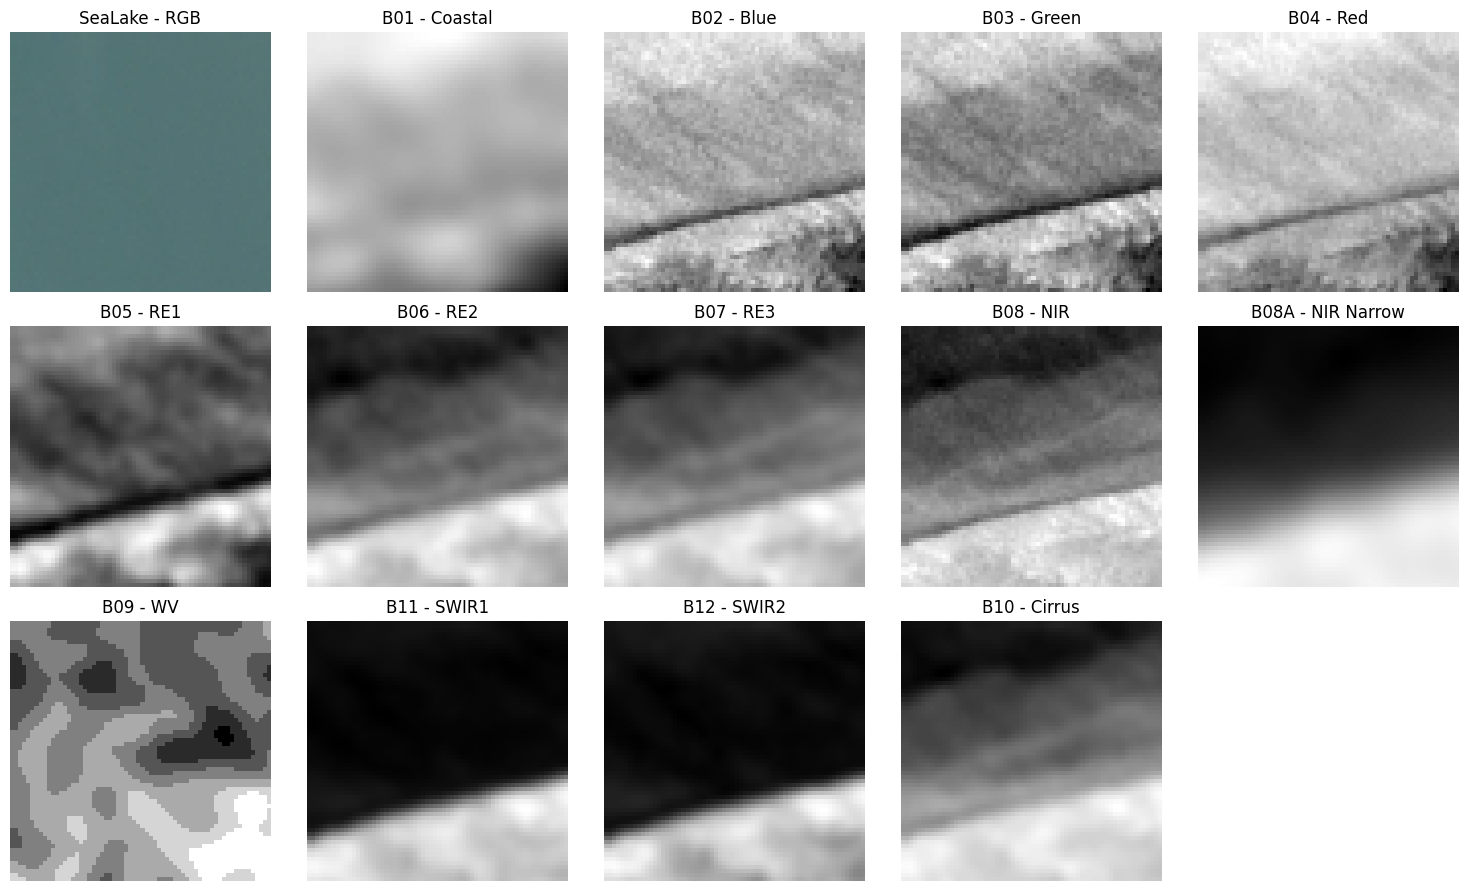

In [21]:
for cls in CLASSES:
    print(f"\n=== {cls} ===")

    # --- Load one RGB image ---
    rgb_path = os.path.join(RGB_ROOT, cls)
    rgb_file = os.listdir(rgb_path)[0]
    rgb_img = Image.open(os.path.join(rgb_path, rgb_file))
    rgb_img = np.array(rgb_img)

    # --- Load one AllBands image ---
    band_path = os.path.join(ALLBANDS_ROOT, cls)

    # Filter for .tif files only
    tif_files = [f for f in os.listdir(band_path) if f.endswith('.tif')]
    band_file = tif_files[0]  # first .tif file

    # Use rasterio to open .tif files
    with rasterio.open(os.path.join(band_path, band_file)) as src:
        band_img = src.read() # shape: (13, 64, 64)

    # Transpose to (H, W, C) for matplotlib imshow
    band_img = band_img.transpose(1, 2, 0)

    # --- Plot ---
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.flatten()

    # Show original RGB
    axes[0].imshow(rgb_img)
    axes[0].set_title(f"{cls} - RGB")
    axes[0].axis("off")

    # Show 13-band images
    for i in range(13):
        axes[i+1].imshow(normalize(band_img[:, :, i]), cmap='gray')
        axes[i+1].set_title(band_names[i])
        axes[i+1].axis("off")

    # Turn off rest
    for j in range(14, 15):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


In [22]:
!pip install rasterio scikit-learn matplotlib seaborn tifffile


Classes found: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
AnnualCrop: 3000 files
Forest: 3000 files
HerbaceousVegetation: 3000 files
Highway: 2500 files
Industrial: 2500 files
Pasture: 2000 files
PermanentCrop: 2500 files
Residential: 3000 files
River: 2500 files
SeaLake: 3597 files

Computing NDVI/NDWI/NDBI for one sample per class...


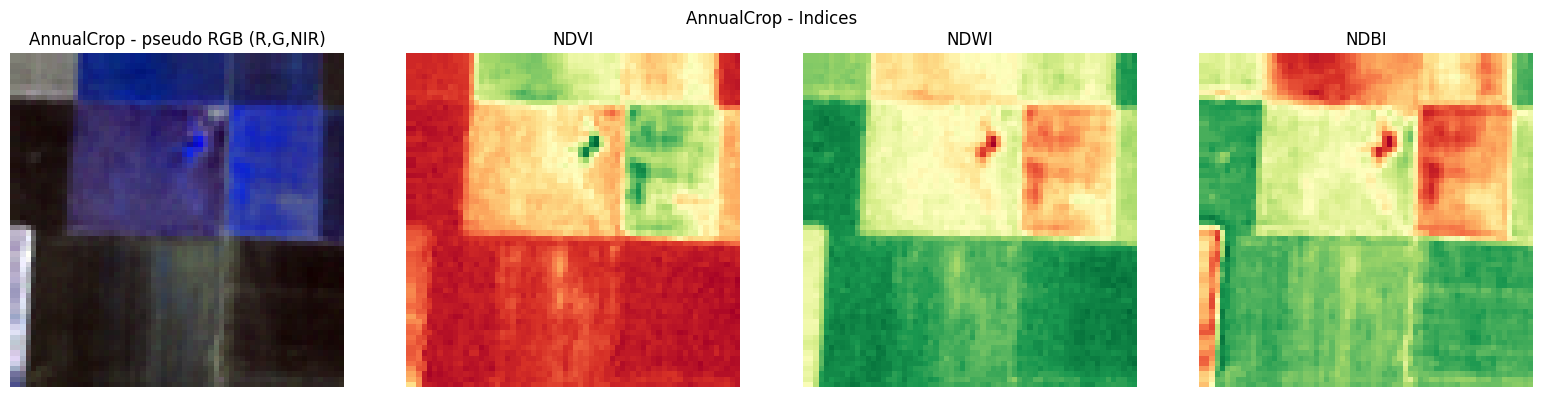

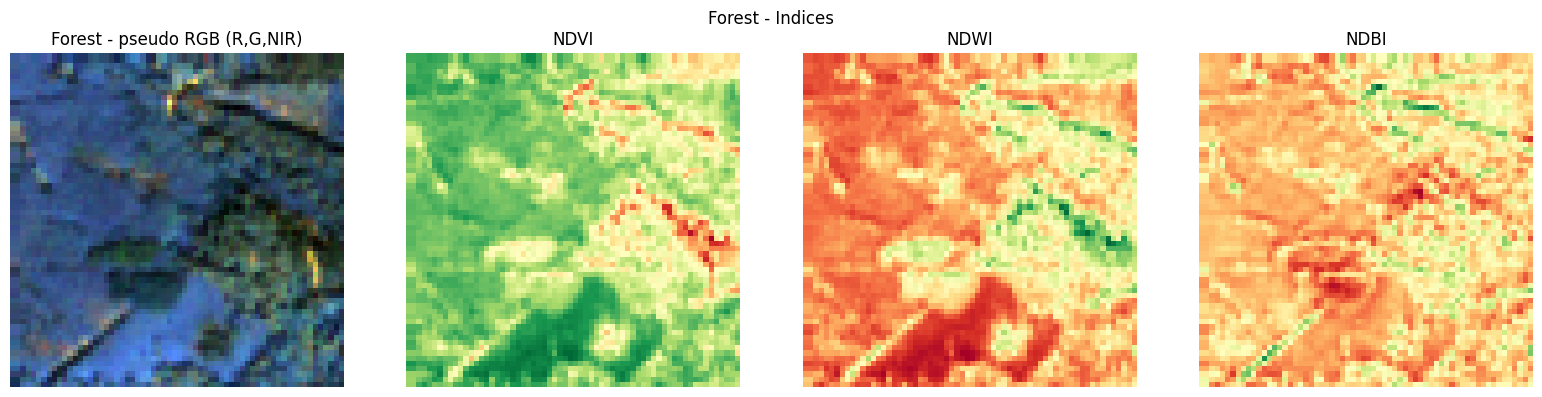

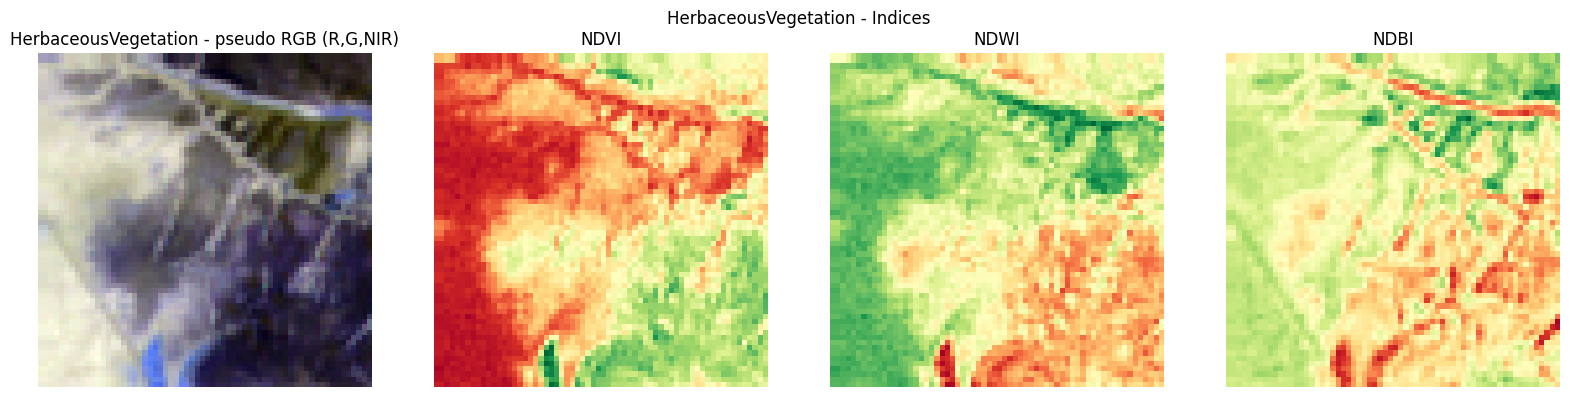

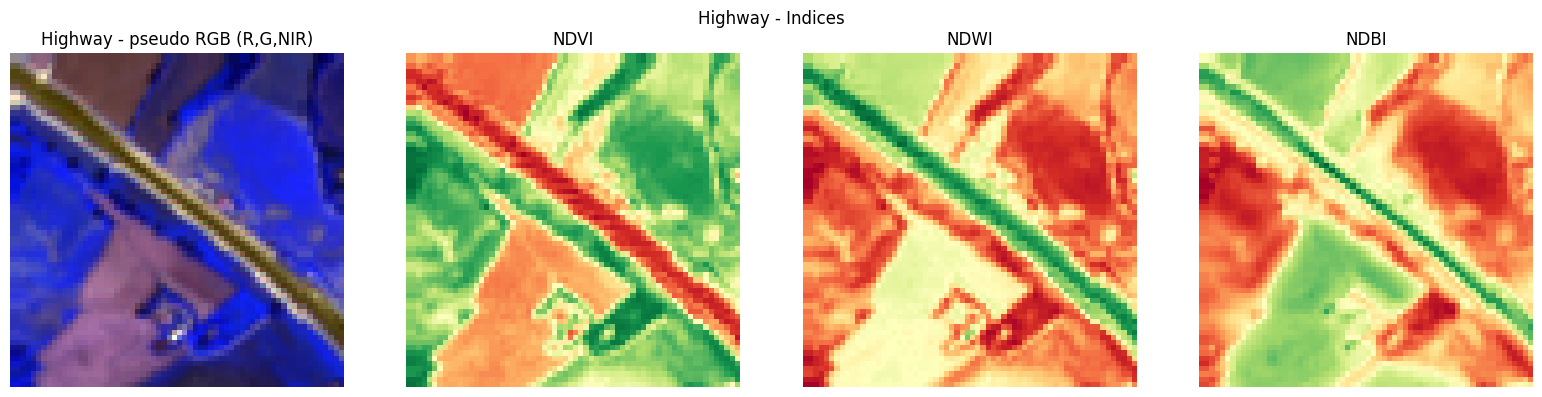

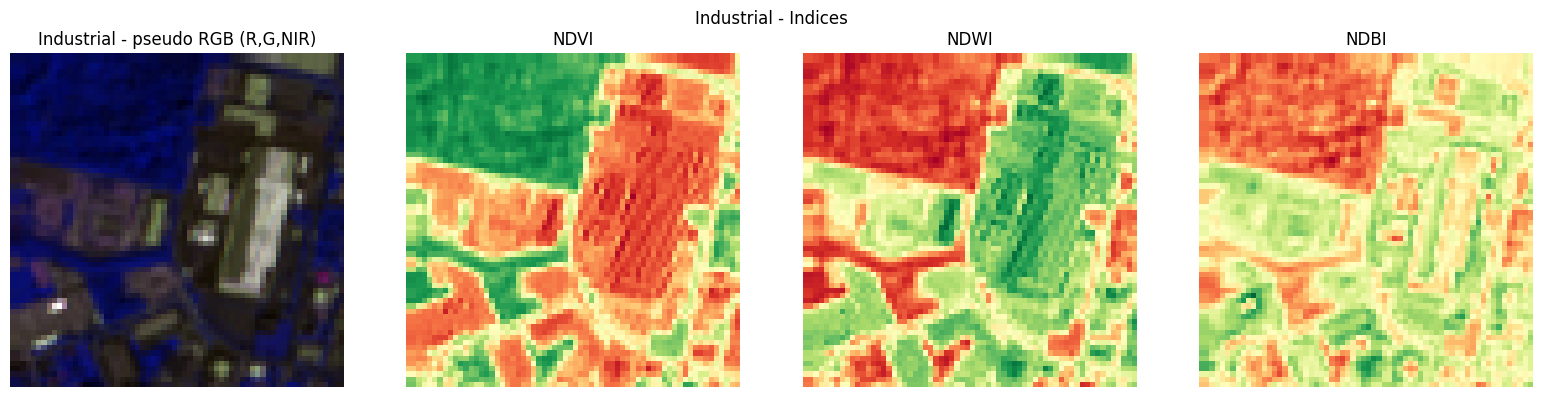

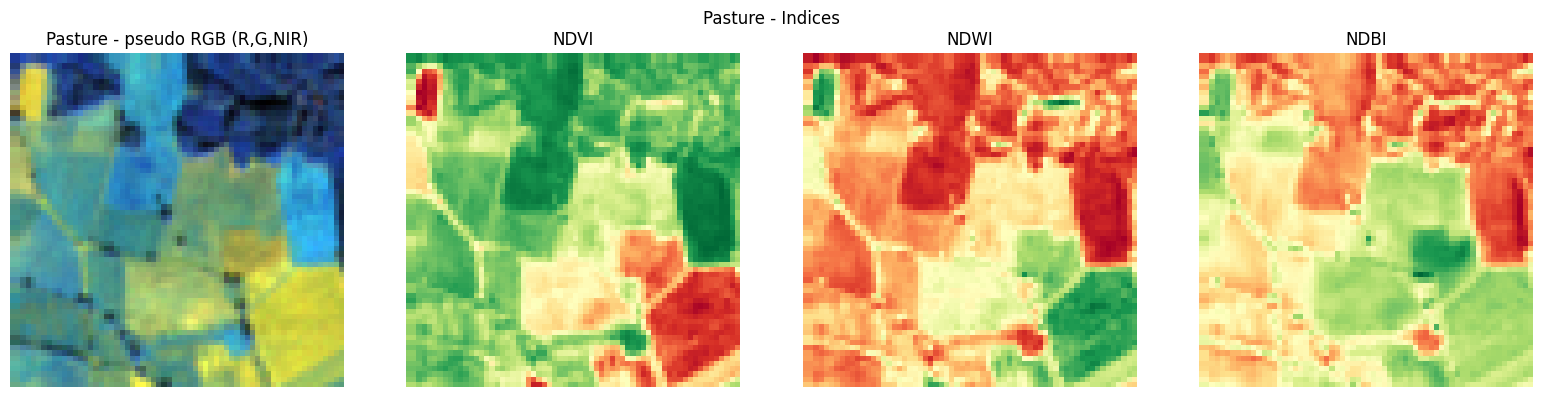

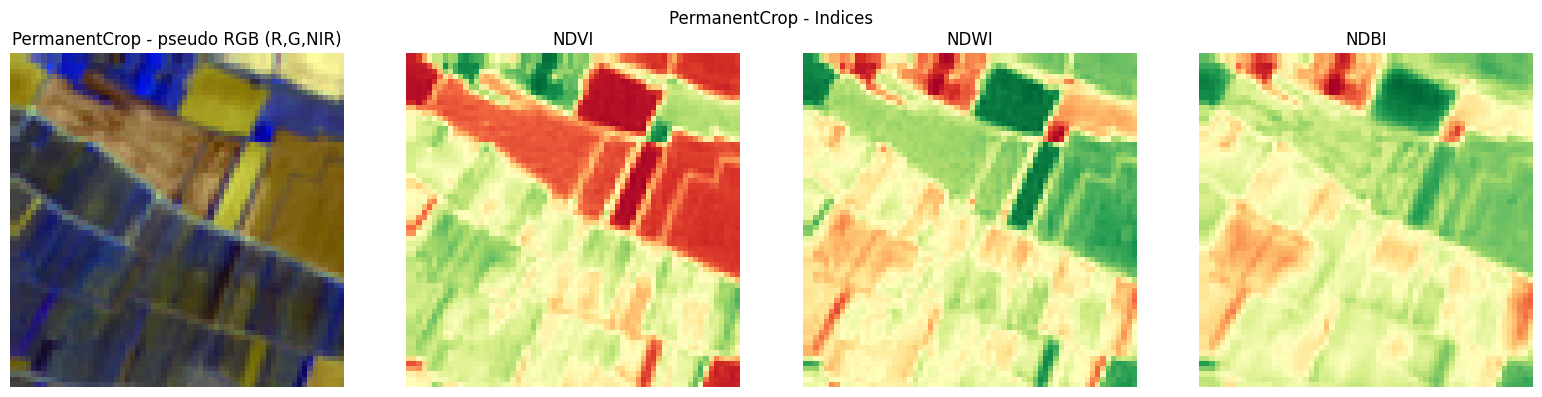

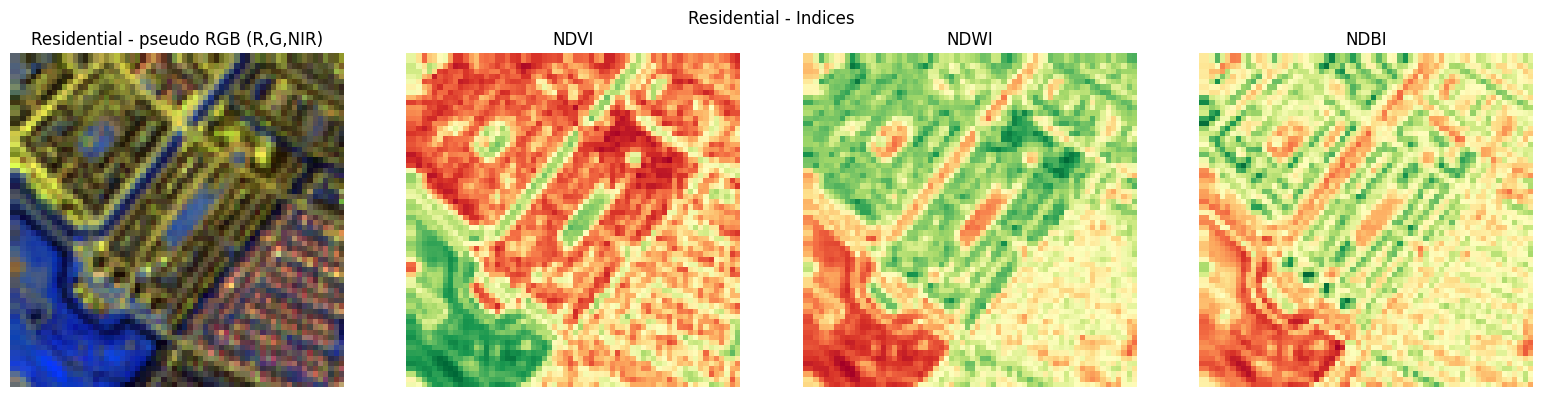

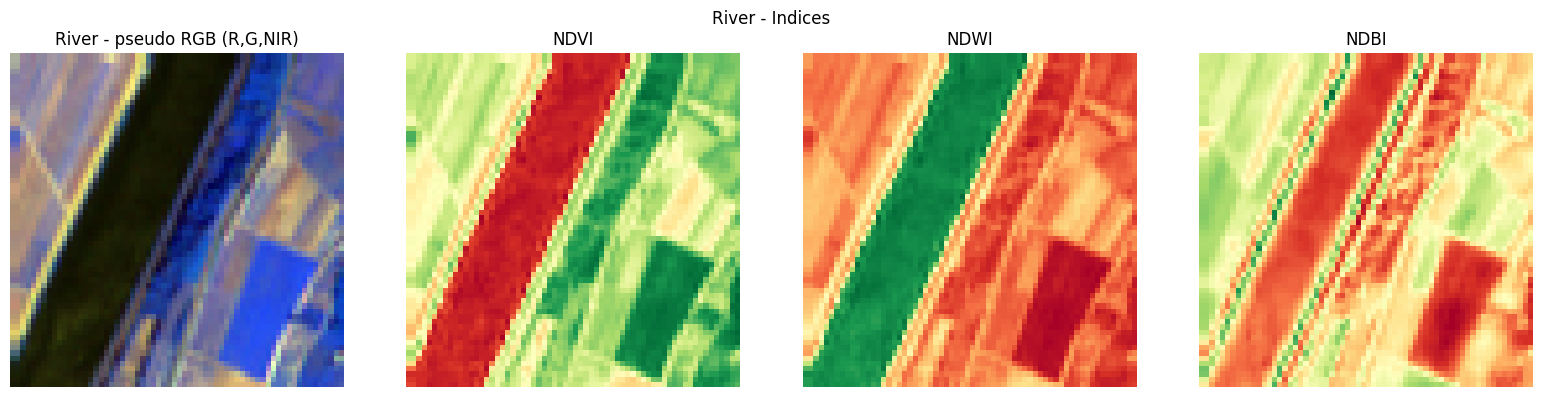

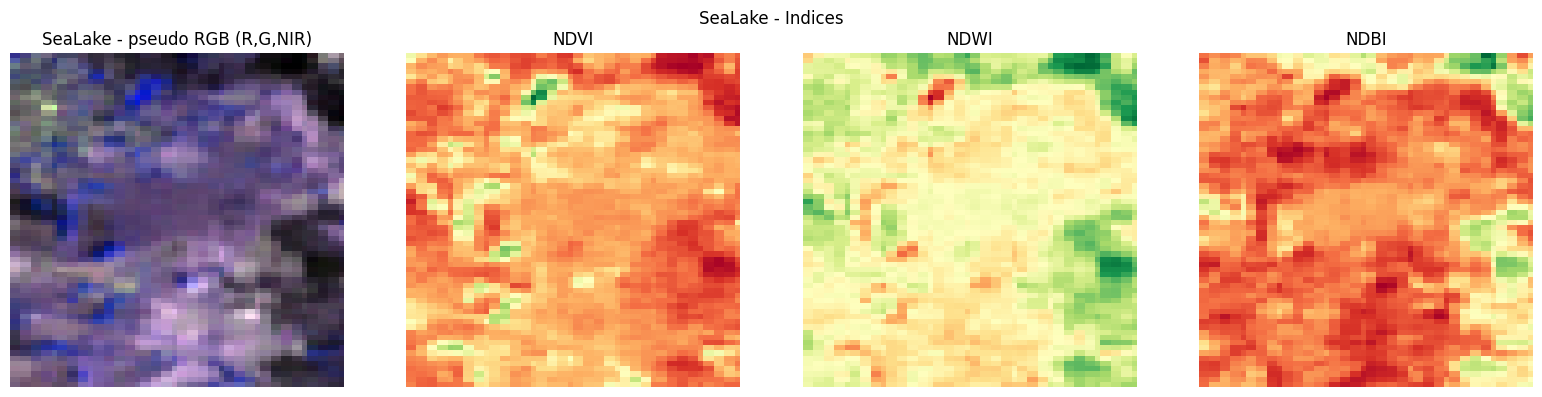

Saved per-class index images to: /content/eurosat_outputs

Sampling per-class mean spectra (this may take some seconds)...
AnnualCrop: sampled 40 spectra
Forest: sampled 40 spectra
HerbaceousVegetation: sampled 40 spectra
Highway: sampled 40 spectra
Industrial: sampled 40 spectra
Pasture: sampled 40 spectra
PermanentCrop: sampled 40 spectra
Residential: sampled 40 spectra
River: sampled 40 spectra
SeaLake: sampled 40 spectra


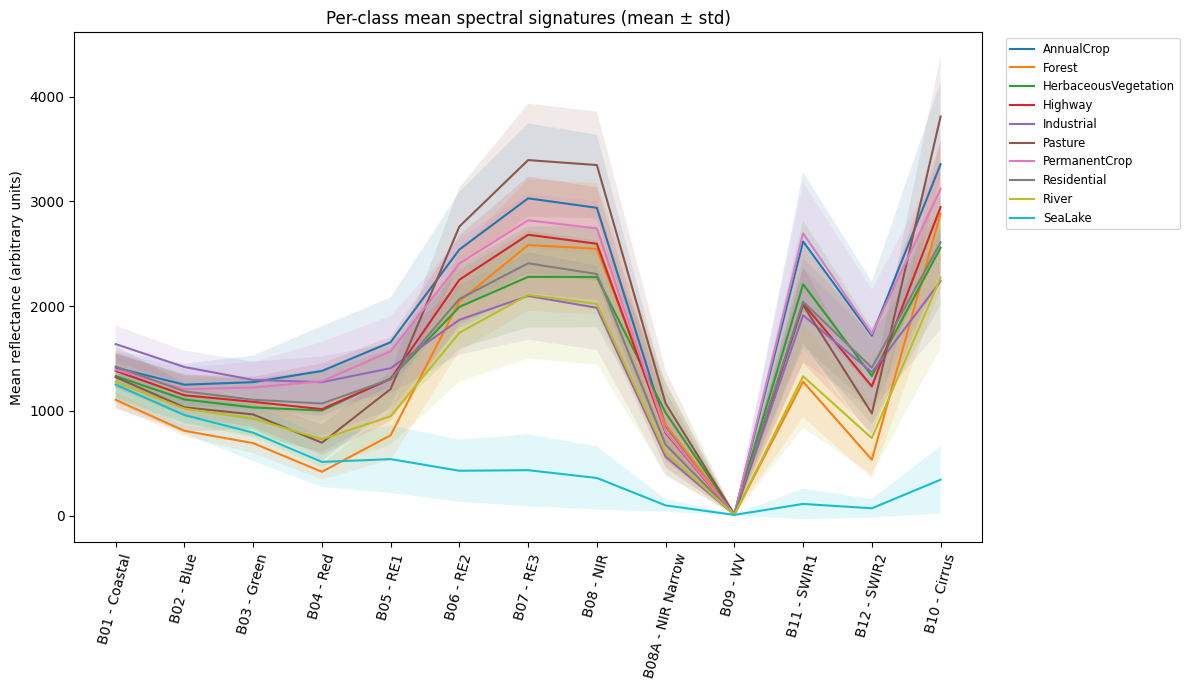

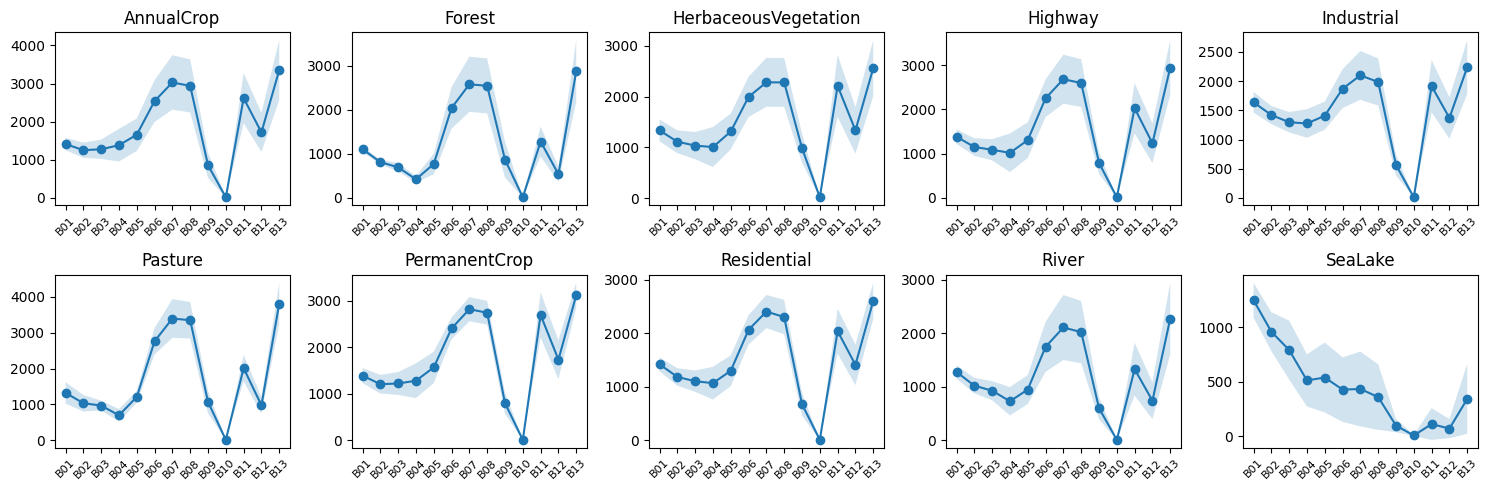


Computing PCA->RGB for one sample per class and saving...


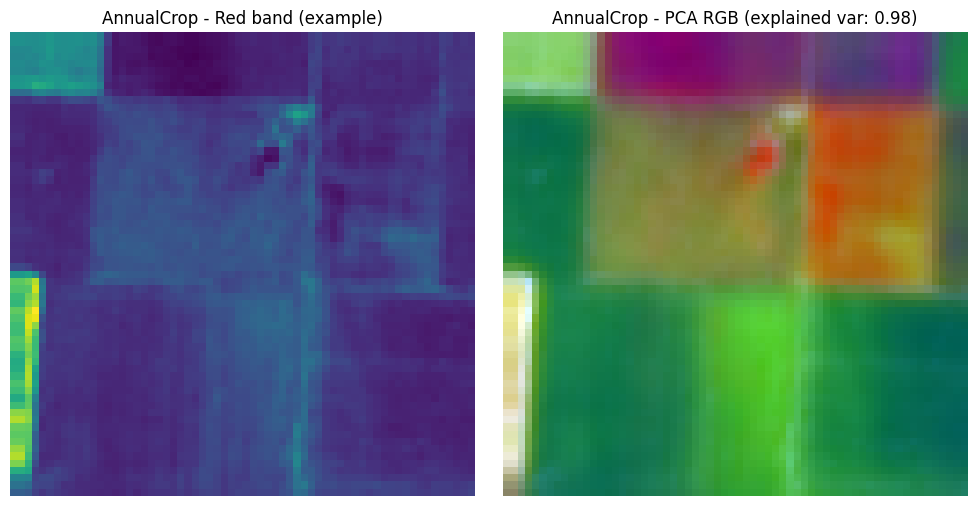

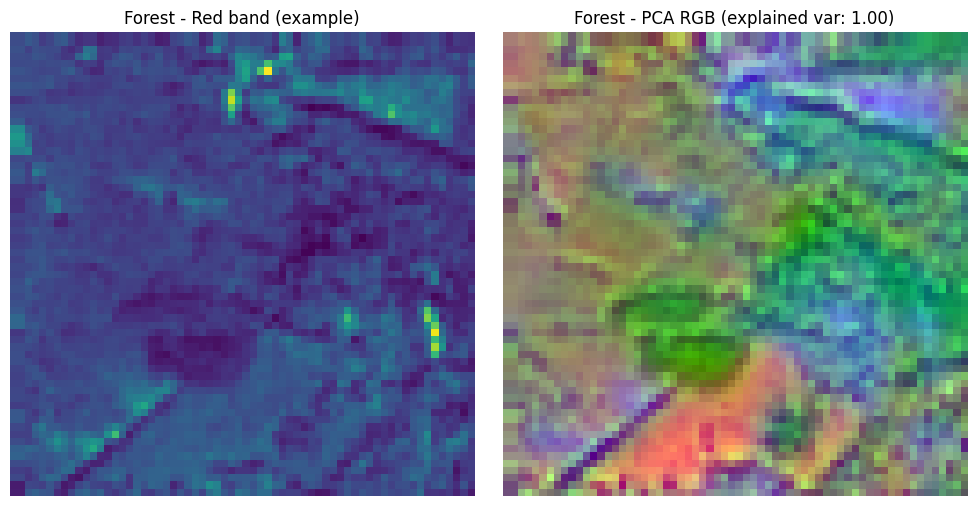

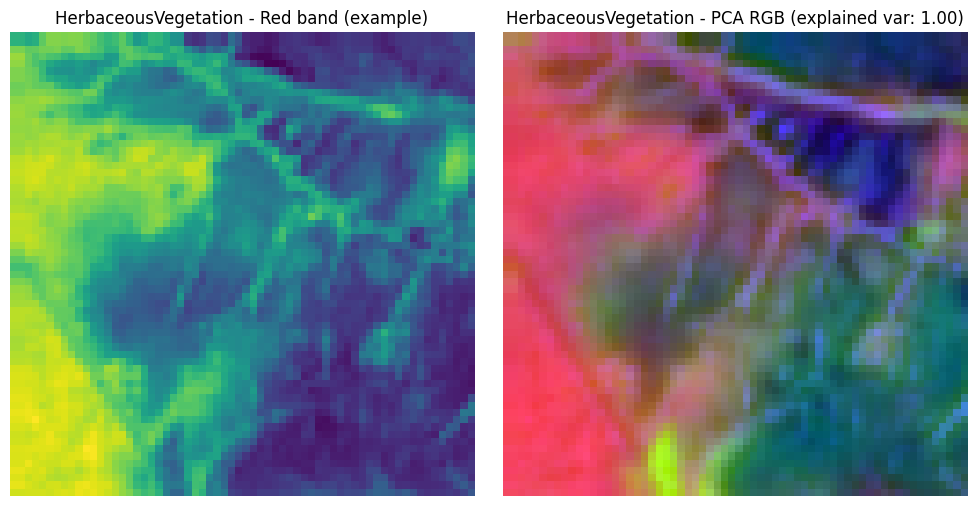

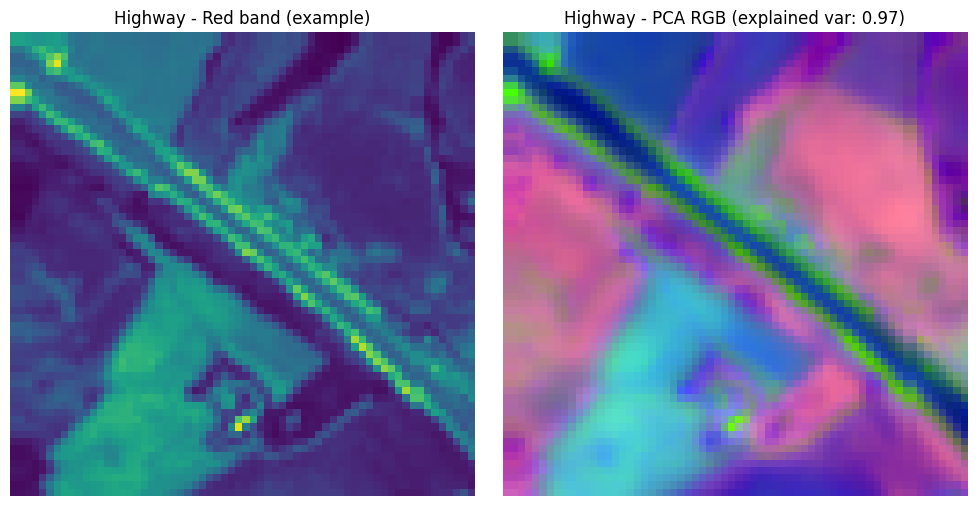

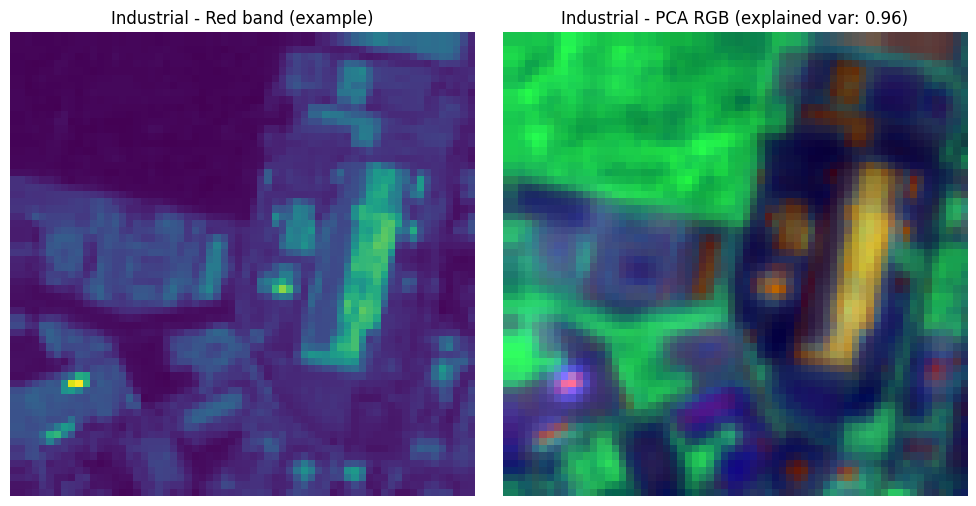

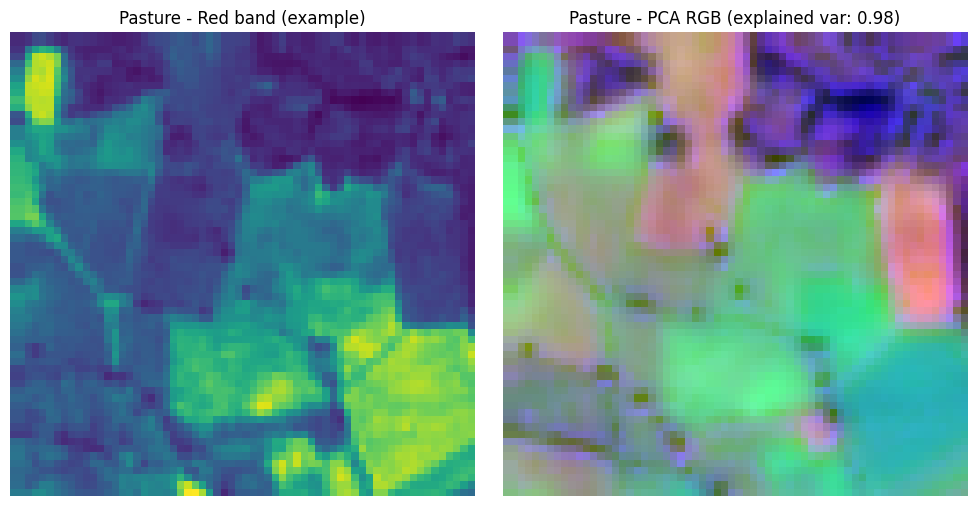

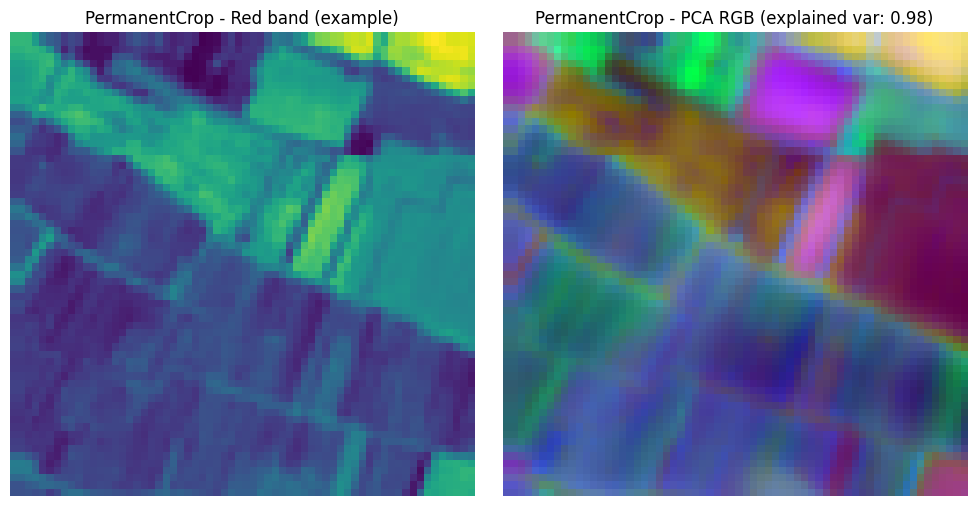

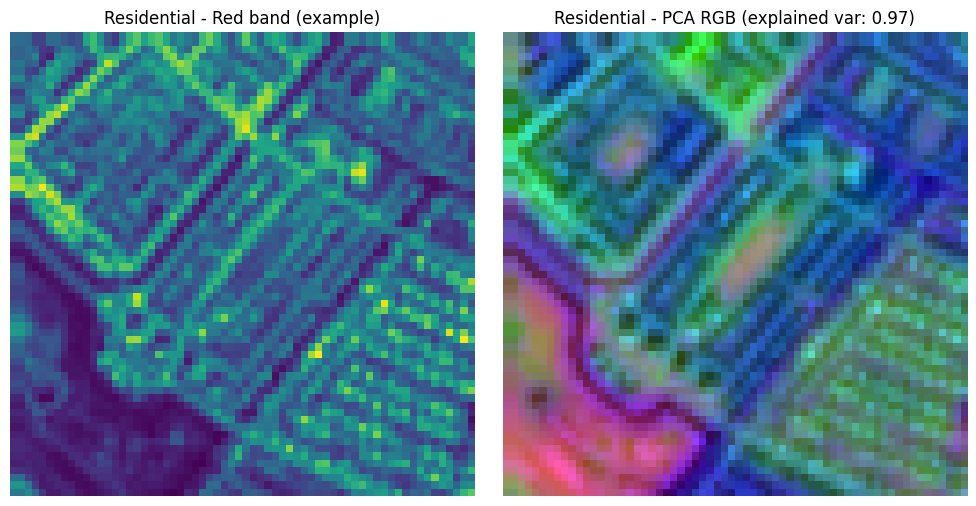

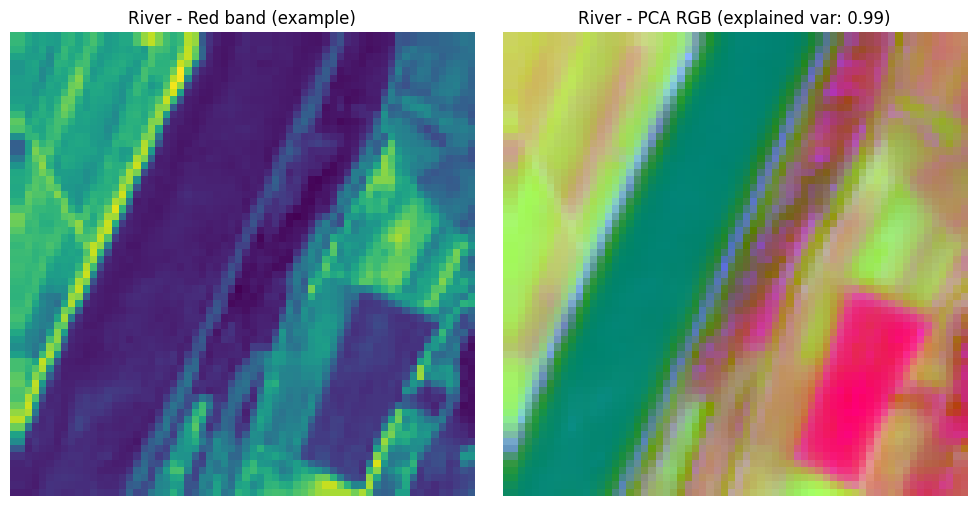

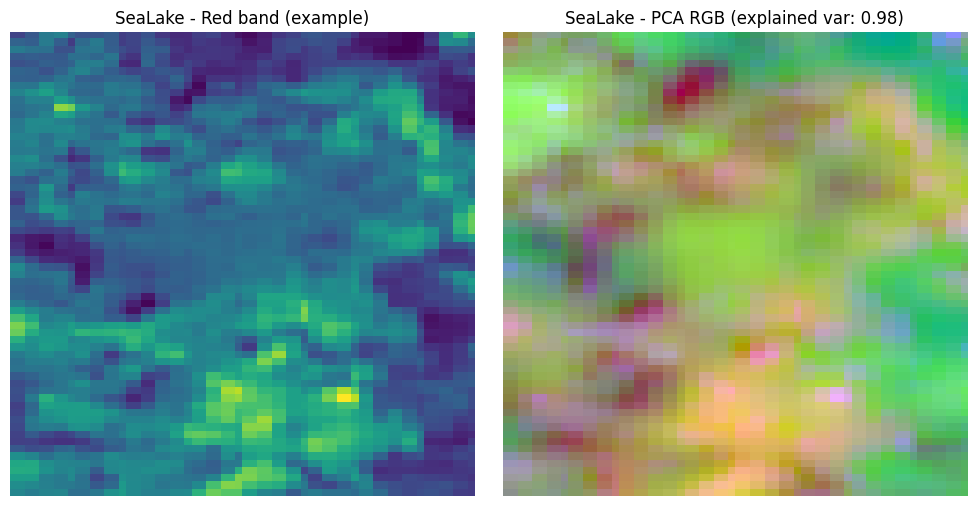


Preparing dataset for band importance (per-image mean spectra)...
Total samples for RF: (400, 13) (400,)
Training RandomForest (lightweight) ...
RF accuracy on mean-spectra test: 0.53
Computing permutation importance (this may take a little)...


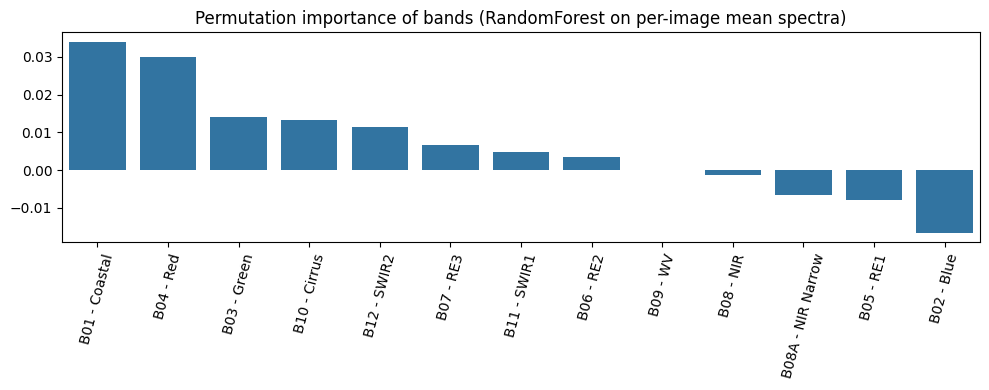

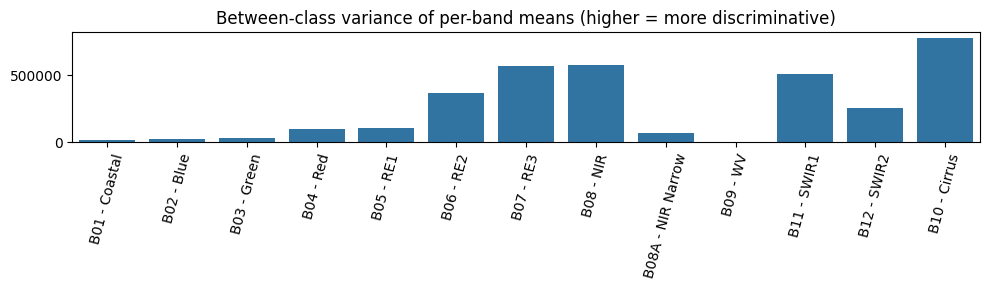


Saving full per-class visualizations (one sample each)...


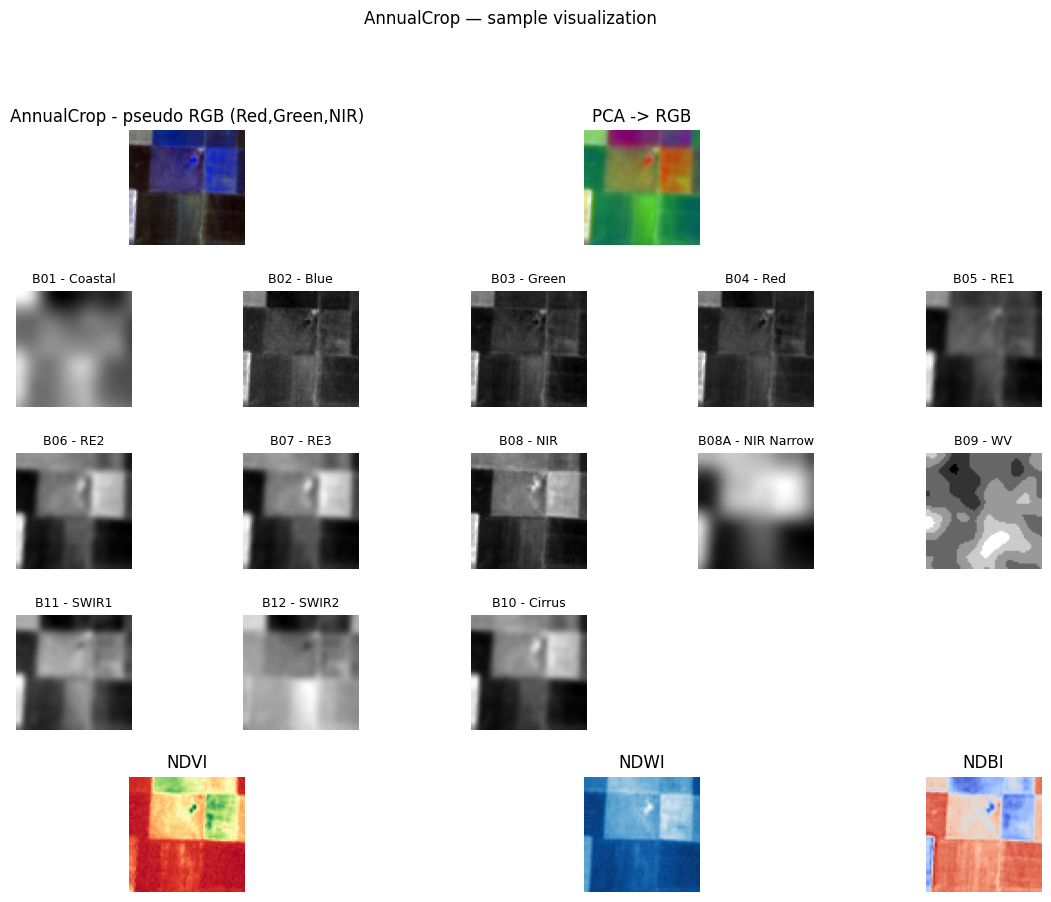

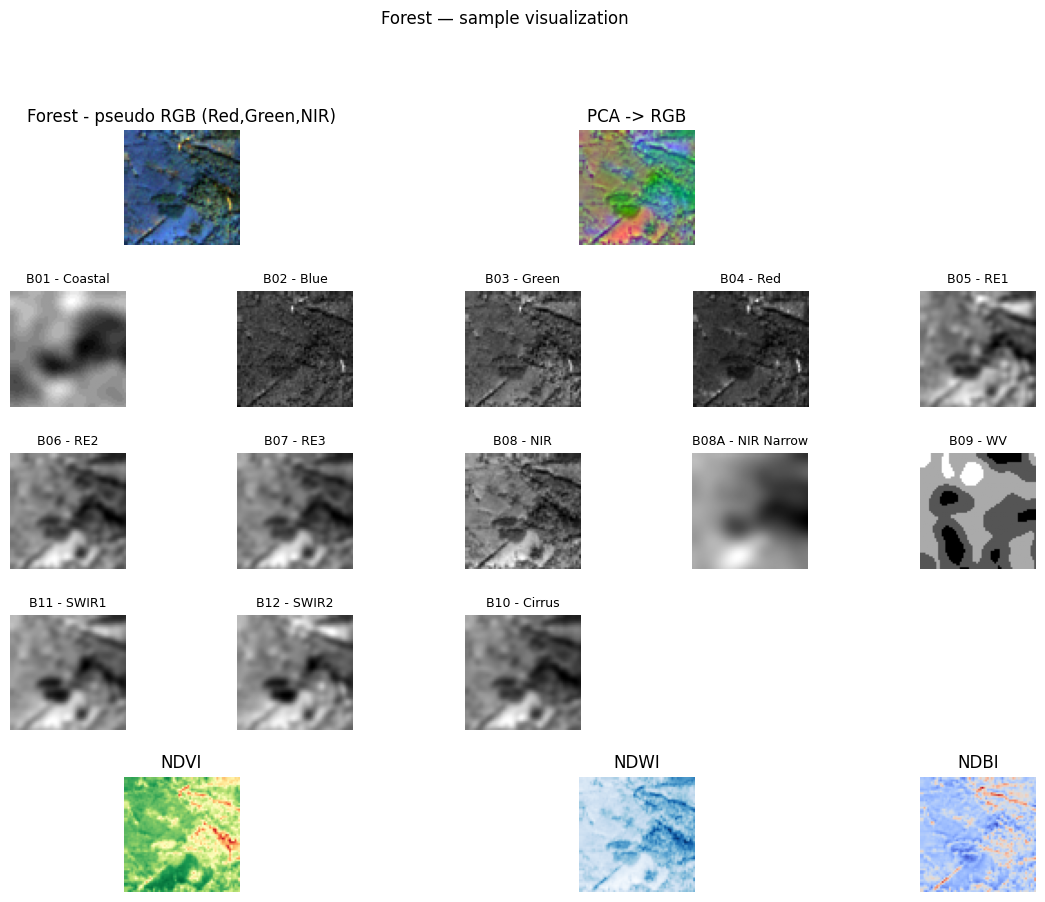

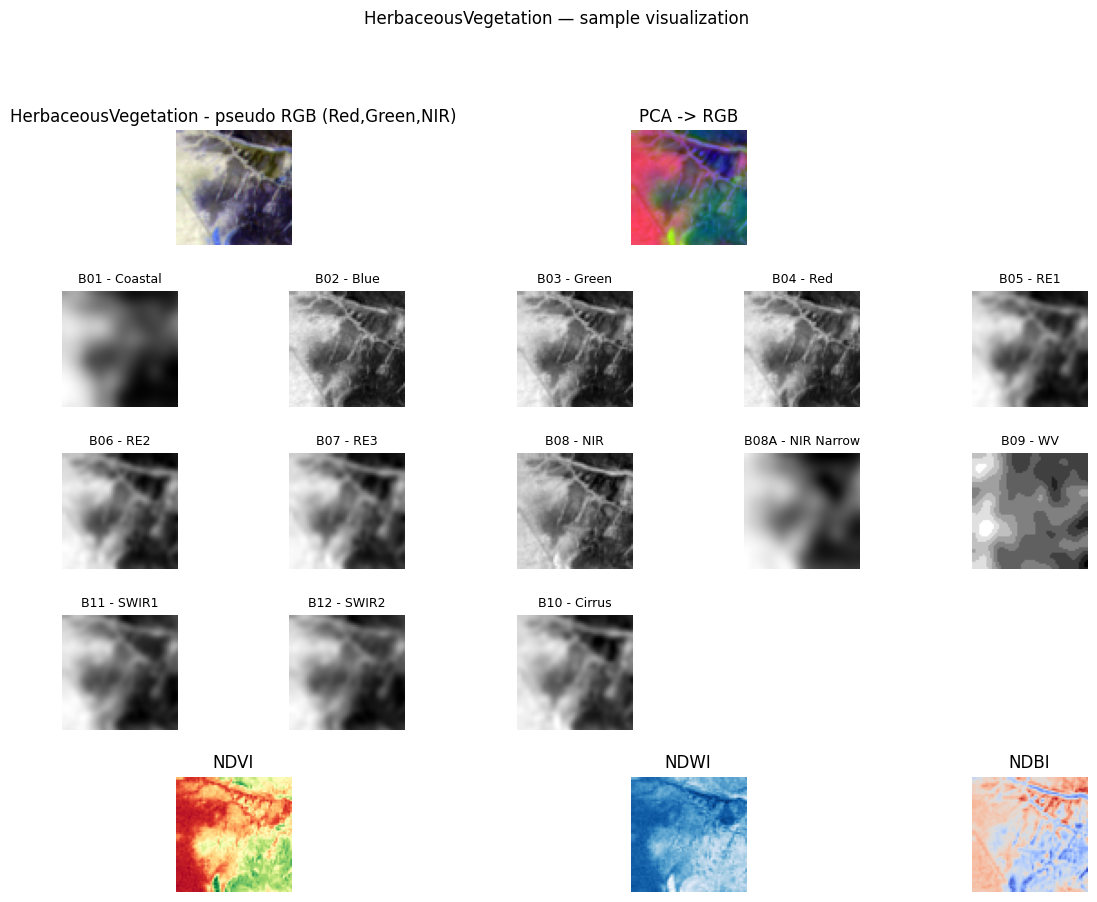

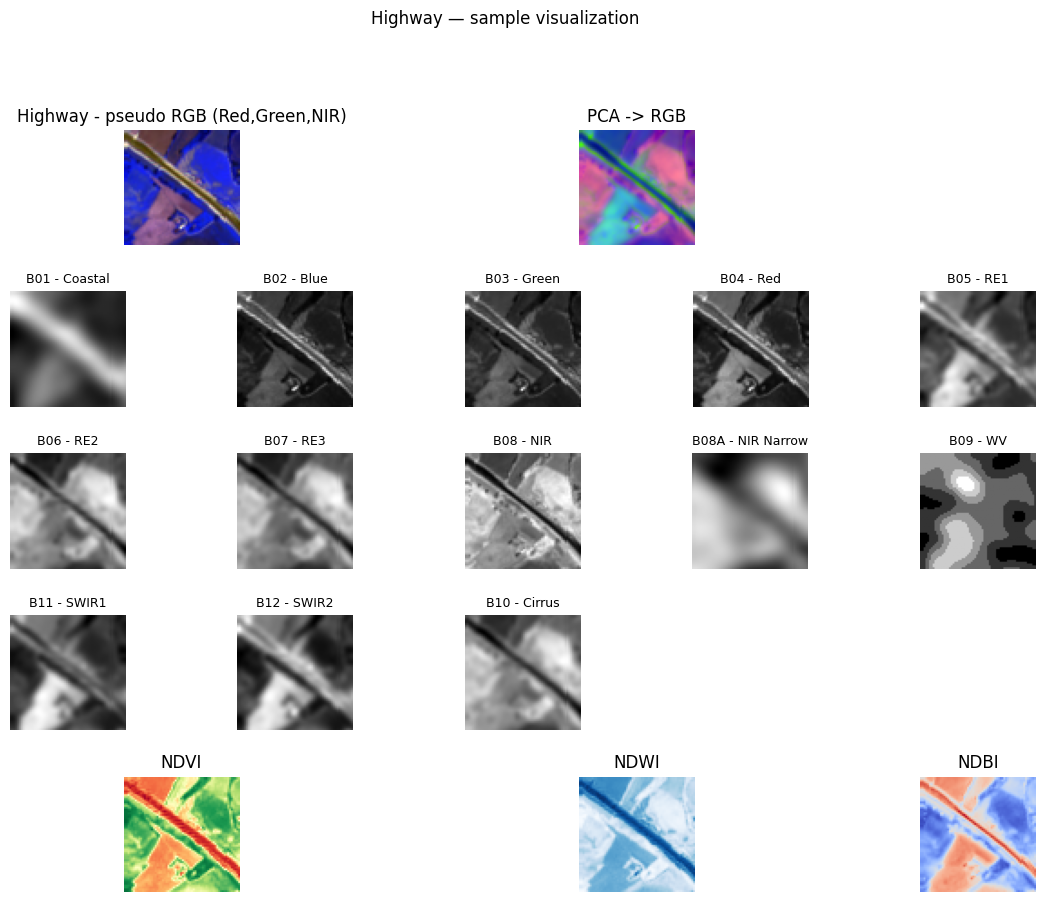

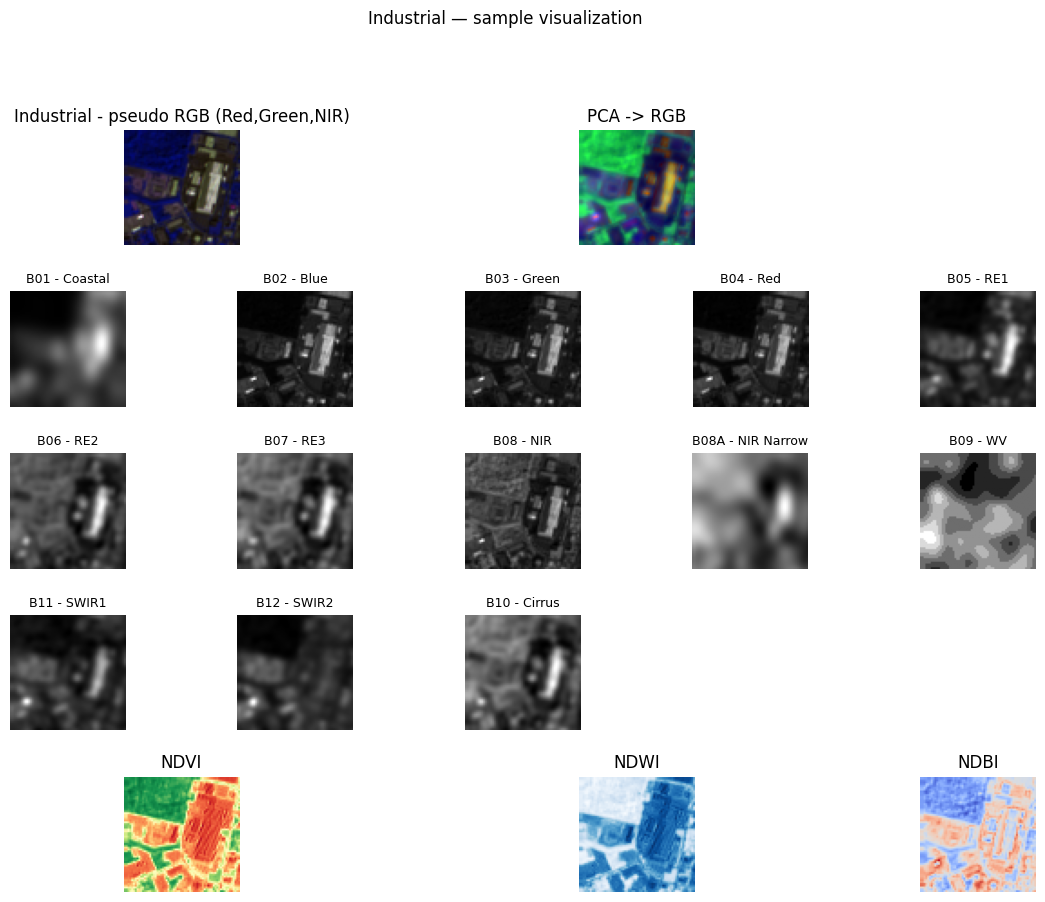

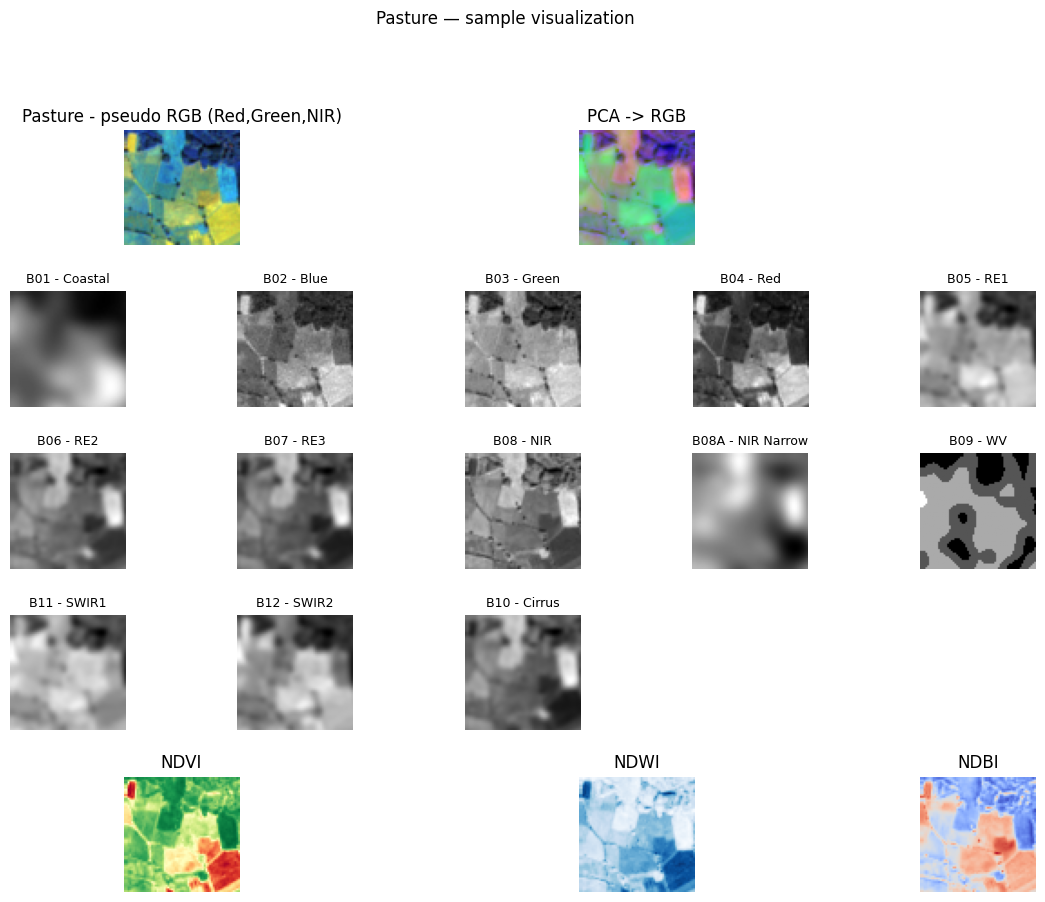

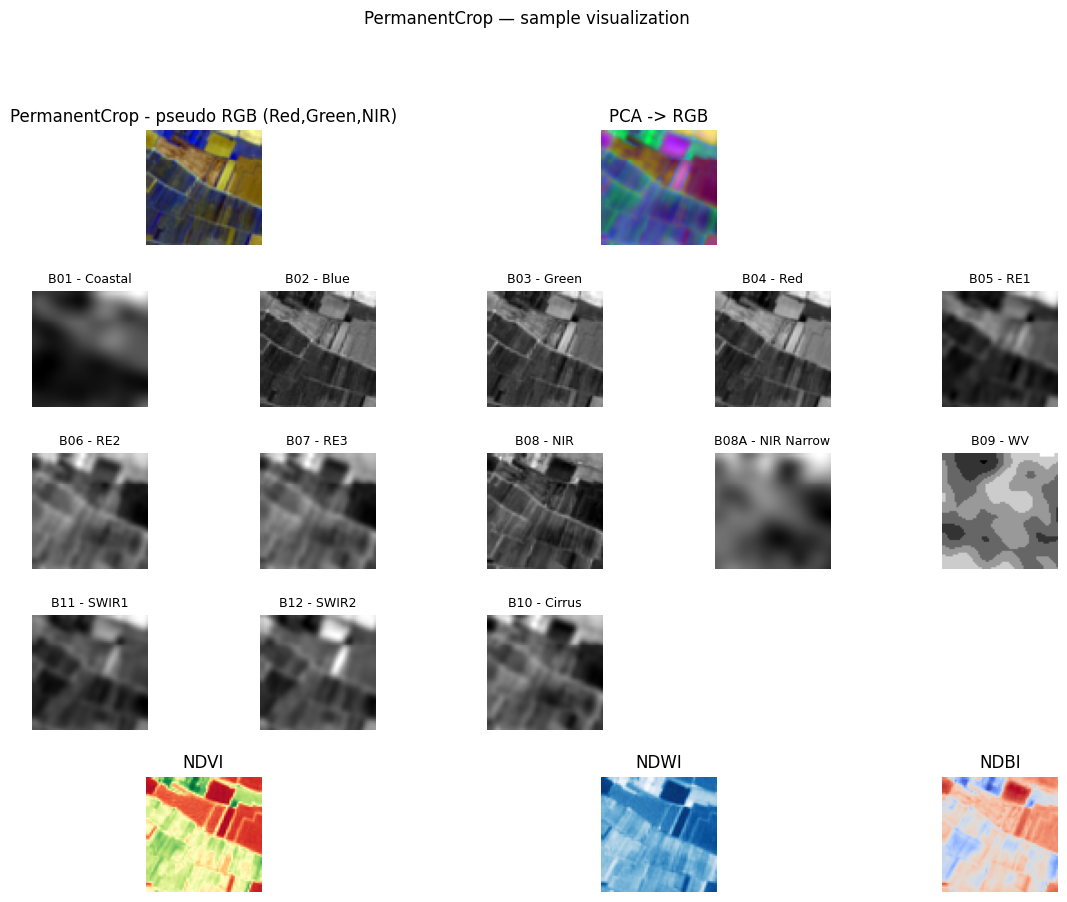

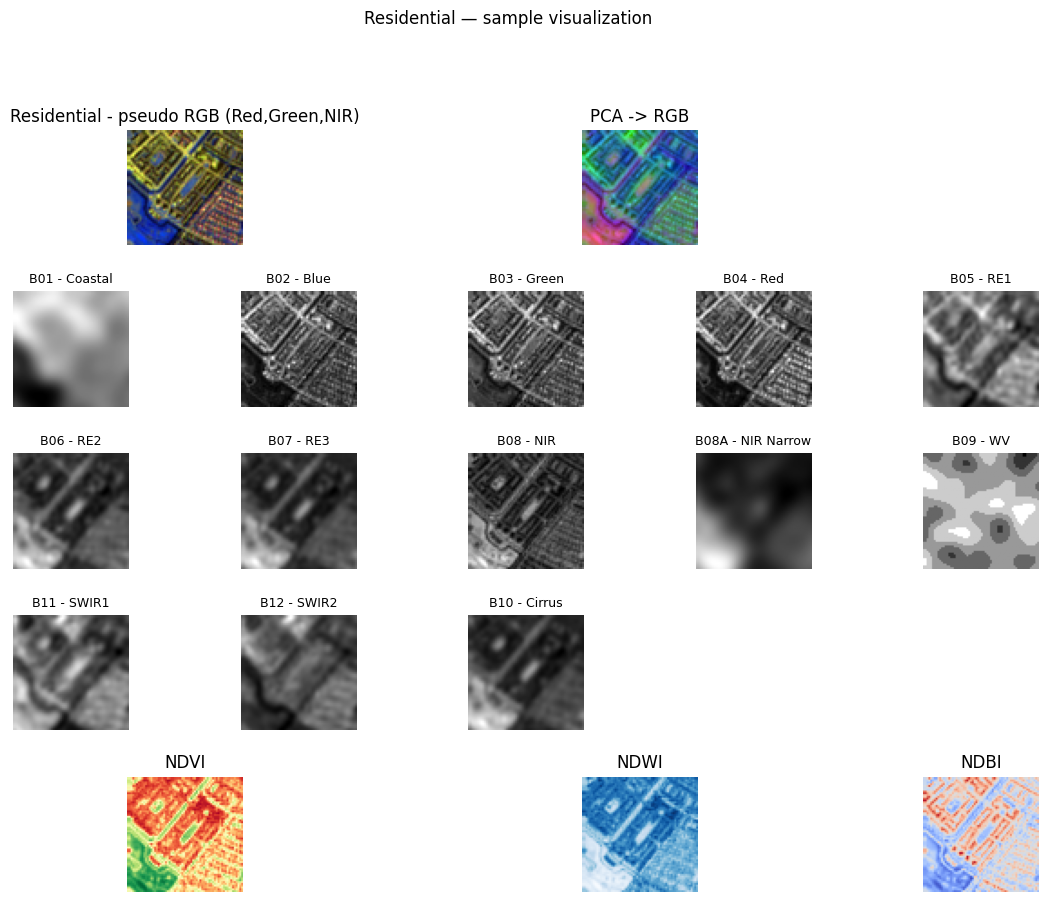

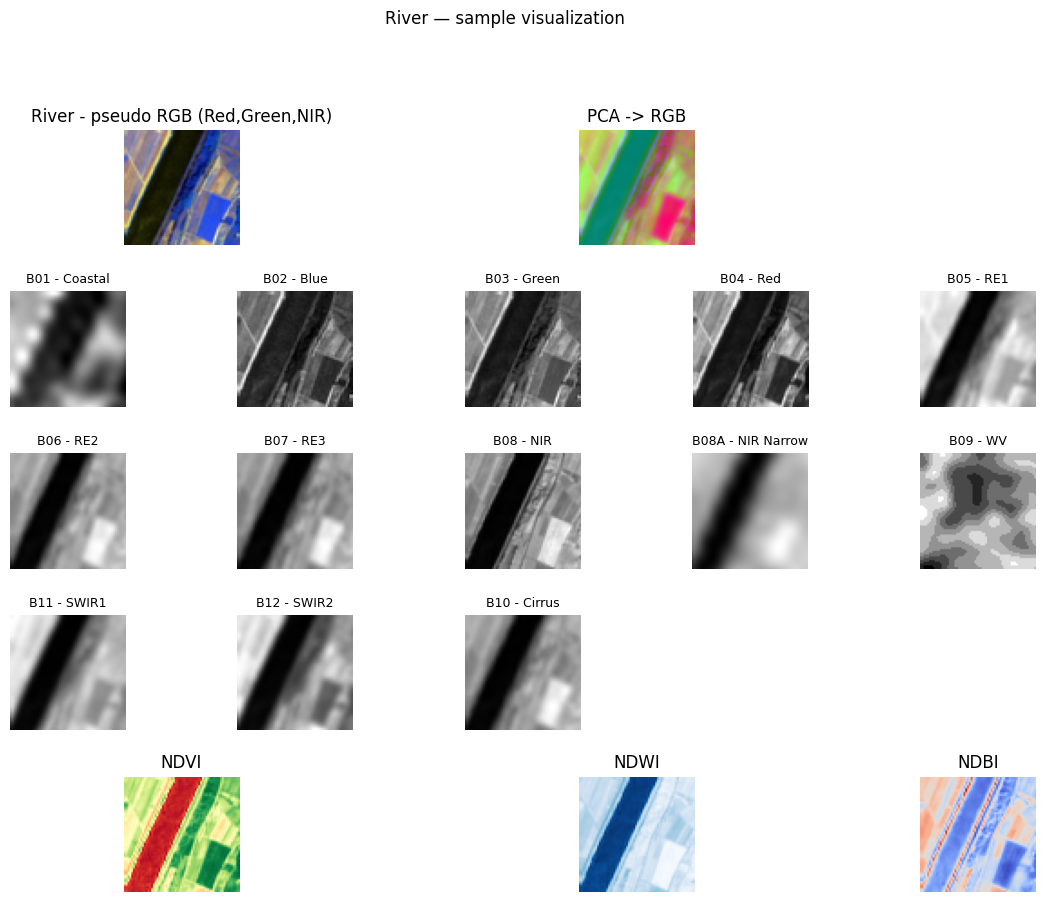

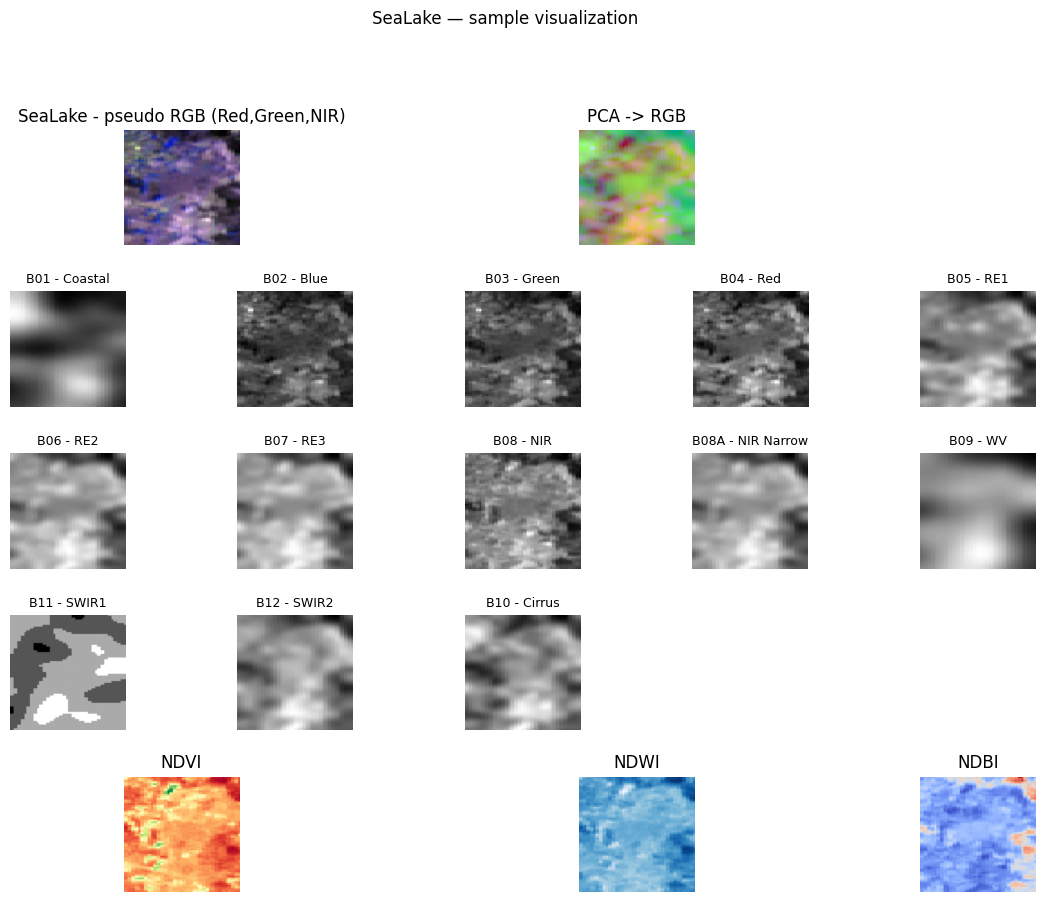


All outputs saved to: /content/eurosat_outputs
Done.


In [23]:
# EuroSAT 13-band analysis notebook script
# - NDVI, NDWI, NDBI
# - Spectral signatures (mean ± std) per class
# - PCA -> RGB composite
# - Band importance heatmap (RandomForest + permutation importance)
# - Visualizations and saved outputs

import os, sys, math, time, gc
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import rasterio
from rasterio.plot import reshape_as_image
import tifffile

# ----------------- CONFIG -----------------
ROOT_13B = "/content/eurosat_data/EuroSATallBands"   # change to your path
ROOT_RGB = "/content/eurosat_data/EuroSAT"           # optional: if you also have RGB folder
OUT_DIR = "/content/eurosat_outputs"
SAMPLES_PER_CLASS = 40    # reduce if memory constrained
SAMPLE_FOR_FULL_VIS = 1   # number of images per class to show full visualization
BAND_NAMES = [
    "B01 - Coastal", "B02 - Blue", "B03 - Green", "B04 - Red",
    "B05 - RE1", "B06 - RE2", "B07 - RE3", "B08 - NIR",
    "B08A - NIR Narrow", "B09 - WV", "B11 - SWIR1",
    "B12 - SWIR2", "B10 - Cirrus"
]
# band indices in array (assumes saved order matches this list)
IDX_RED = 3
IDX_GREEN = 2
IDX_NIR = 7
IDX_SWIR1 = 10

os.makedirs(OUT_DIR, exist_ok=True)

# ----------------- UTILITIES -----------------
def read_13band_image(path):
    """
    Read a 13-band image file.
    Supports GeoTIFF (via rasterio) or .npy (numpy) or .tif via tifffile.
    Returns array shape (H, W, 13), dtype=float32.
    """
    ext = os.path.splitext(path)[1].lower()
    if ext in ('.npy',):
        arr = np.load(path).astype(np.float32)
    elif ext in ('.tif', '.tiff'):
        # try rasterio first
        try:
            with rasterio.open(path) as src:
                data = src.read()  # shape (bands, H, W)
                data = np.transpose(data, (1,2,0))
                arr = data.astype(np.float32)
        except Exception:
            # fallback to tifffile
            arr = tifffile.imread(path).astype(np.float32)
            # if arr shape is (13, H, W) transpose
            if arr.ndim == 3 and arr.shape[0] == 13:
                arr = np.transpose(arr, (1,2,0))
    else:
        raise ValueError(f"Unsupported file extension: {ext}")
    return arr

def normalize_for_display(x, eps=1e-8):
    x = x.astype(np.float32)
    mn = np.nanmin(x)
    mx = np.nanmax(x)
    if mx - mn < eps:
        return np.zeros_like(x)
    return (x - mn)/(mx - mn)

def compute_indices(bands):
    """Given (H,W,13) array, compute NDVI, NDWI, NDBI (float arrays)"""
    eps = 1e-8
    R = bands[:,:,IDX_RED].astype(np.float32)
    G = bands[:,:,IDX_GREEN].astype(np.float32)
    NIR = bands[:,:,IDX_NIR].astype(np.float32)
    SWIR = bands[:,:,IDX_SWIR1].astype(np.float32)
    ndvi = (NIR - R) / (NIR + R + eps)
    ndwi = (G - NIR) / (G + NIR + eps)
    ndbi = (SWIR - NIR) / (SWIR + NIR + eps)
    return {"NDVI": ndvi, "NDWI": ndwi, "NDBI": ndbi}

def pca_rgb_from_13band(arr13):
    """
    Convert (H,W,13) to a PCA RGB composite scaled to 0..1
    """
    H, W, C = arr13.shape
    X = arr13.reshape(-1, C)
    # handle constant or NaN rows
    finite_mask = np.isfinite(X).all(axis=1)
    Xf = X[finite_mask]
    if Xf.shape[0] < 3:
        # fallback: replicate channel 3,2,1
        rgb = np.stack([normalize_for_display(arr13[:,:,IDX_NIR]),
                        normalize_for_display(arr13[:,:,IDX_RED]),
                        normalize_for_display(arr13[:,:,IDX_GREEN])], axis=-1)
        return rgb, np.array([1.0, 0.0, 0.0])
    pca = PCA(n_components=3)
    Xp = pca.fit_transform(Xf)
    # build full array
    X_out = np.zeros((X.shape[0], 3), dtype=np.float32)
    X_out[finite_mask] = Xp
    # min-max scale each PC channel to 0..1
    scaler = MinMaxScaler()
    Xs = scaler.fit_transform(X_out)
    rgb = Xs.reshape(H, W, 3)
    return rgb, pca.explained_variance_ratio_

# ----------------- Discover classes and files -----------------
classes = sorted([d for d in os.listdir(ROOT_13B) if os.path.isdir(os.path.join(ROOT_13B, d))])
print("Classes found:", classes)

# list files per class (13-band)
files_by_class = {}
for c in classes:
    p = os.path.join(ROOT_13B, c)
    fl = [os.path.join(p, f) for f in os.listdir(p) if f.lower().endswith(('.tif','.tiff','.npy'))]
    files_by_class[c] = sorted(fl)
    print(f"{c}: {len(fl)} files")

# ----------------- 1) NDVI/NDWI/NDBI for one sample per class -----------------
print("\nComputing NDVI/NDWI/NDBI for one sample per class...")
one_samples = {}
for c in classes:
    if len(files_by_class[c]) == 0:
        continue
    path = files_by_class[c][0]
    arr = read_13band_image(path)  # (H,W,13)
    one_samples[c] = {"path": path, "arr": arr}
    indices = compute_indices(arr)
    # plot and save
    fig, axs = plt.subplots(1,4, figsize=(16,4))
    # attempt to show RGB - build from bands if RGB folder exists else from bands B04,B03,B02
    rgb_img = None
    rgb_from_13 = np.stack([normalize_for_display(arr[:,:,IDX_RED]),
                            normalize_for_display(arr[:,:,IDX_GREEN]),
                            normalize_for_display(arr[:,:,IDX_NIR])], axis=-1)  # NIR into B to highlight veg
    axs[0].imshow(rgb_from_13)
    axs[0].set_title(f"{c} - pseudo RGB (R,G,NIR)")
    axs[0].axis('off')
    for i, (name, im) in enumerate(indices.items(), start=1):
        axs[i].imshow(normalize_for_display(im), cmap='RdYlGn')
        axs[i].set_title(name)
        axs[i].axis('off')
    plt.suptitle(f"{c} - Indices")
    plt.tight_layout()
    fpath = os.path.join(OUT_DIR, f"{c}_indices.png")
    plt.savefig(fpath, dpi=150)
    plt.show()
    plt.close()

print("Saved per-class index images to:", OUT_DIR)

# ----------------- 2) Spectral signatures (sample many images per class) -----------------
print("\nSampling per-class mean spectra (this may take some seconds)...")
spectra_by_class = {}
for c in classes:
    files = files_by_class[c]
    if len(files) == 0:
        continue
    chosen = files if len(files) <= SAMPLES_PER_CLASS else list(np.random.choice(files, SAMPLES_PER_CLASS, replace=False))
    arrs = []
    for p in chosen:
        arr = read_13band_image(p)
        # per-image mean spectrum: average reflectance across all pixels for each band
        mean_spec = arr.reshape(-1, arr.shape[-1]).mean(axis=0)
        arrs.append(mean_spec)
        # free memory
        del arr
    spectra_by_class[c] = np.vstack(arrs)  # shape (n_samples, 13)
    print(f"{c}: sampled {spectra_by_class[c].shape[0]} spectra")
    gc.collect()

# plot mean ± std per class (overlay)
plt.figure(figsize=(12,7))
for c in classes:
    arr = spectra_by_class[c]
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    x = np.arange(len(BAND_NAMES))
    plt.plot(x, mean, label=c)
    plt.fill_between(x, mean-std, mean+std, alpha=0.12)
plt.xticks(np.arange(len(BAND_NAMES)), BAND_NAMES, rotation=75)
plt.ylabel("Mean reflectance (arbitrary units)")
plt.title("Per-class mean spectral signatures (mean ± std)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "spectral_signatures_all_classes.png"), dpi=150)
plt.show()

# per-class subplot grid
n = len(classes)
cols = 5
rows = math.ceil(n / cols)
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5))
axs = axs.flatten()
for i, c in enumerate(classes):
    mean = spectra_by_class[c].mean(axis=0)
    std = spectra_by_class[c].std(axis=0)
    axs[i].plot(mean, marker='o')
    axs[i].fill_between(np.arange(len(mean)), mean-std, mean+std, alpha=0.2)
    axs[i].set_title(c)
    axs[i].set_xticks(np.arange(len(BAND_NAMES)))
    axs[i].set_xticklabels([f"B{str(i+1).zfill(2)}" for i in range(13)], rotation=45, fontsize=8)
for j in range(i+1, len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "spectral_signatures_grid.png"), dpi=150)
plt.show()

# ----------------- 3) PCA -> RGB for one sample per class -----------------
print("\nComputing PCA->RGB for one sample per class and saving...")
for c, info in one_samples.items():
    arr = info["arr"]
    rgb_pca, varr = pca_rgb_from_13band(arr)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(normalize_for_display(arr[:,:,IDX_RED:IDX_RED+1].squeeze() if arr is not None else np.zeros((10,10))))
    ax[0].set_title(f"{c} - Red band (example)")
    ax[0].axis('off')
    ax[1].imshow(rgb_pca)
    ax[1].set_title(f"{c} - PCA RGB (explained var: {varr.sum():.2f})")
    ax[1].axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"{c}_pca_rgb.png"), dpi=150)
    plt.show()
    plt.close()
    gc.collect()

# ----------------- 4) Band importance heatmap (RandomForest on per-image mean spectra) -----------------
print("\nPreparing dataset for band importance (per-image mean spectra)...")
X = []
y = []
class_to_idx = {c:i for i,c in enumerate(classes)}
for c in classes:
    arrs = spectra_by_class[c]  # (n_samples, 13)
    X.append(arrs)
    y.extend([class_to_idx[c]] * arrs.shape[0])
X = np.vstack(X)
y = np.array(y)
print("Total samples for RF:", X.shape, y.shape)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
print("Training RandomForest (lightweight) ...")
rf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=0, n_jobs=2)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)
print("RF accuracy on mean-spectra test:", acc)

# permutation importance (slower but informative)
print("Computing permutation importance (this may take a little)...")
perm = permutation_importance(rf, X_test, y_test, n_repeats=15, random_state=0, n_jobs=2)
importances = perm.importances_mean
order = np.argsort(importances)[::-1]

plt.figure(figsize=(10,4))
sns.barplot(x=[BAND_NAMES[i] for i in order], y=importances[order])
plt.xticks(rotation=75)
plt.title("Permutation importance of bands (RandomForest on per-image mean spectra)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "band_permutation_importance.png"), dpi=150)
plt.show()

# also show variance across classes per band
mean_per_class = np.array([spectra_by_class[c].mean(axis=0) for c in classes])  # (n_classes, 13)
band_var_across_classes = mean_per_class.var(axis=0)
plt.figure(figsize=(10,3))
sns.barplot(x=BAND_NAMES, y=band_var_across_classes)
plt.xticks(rotation=75)
plt.title("Between-class variance of per-band means (higher = more discriminative)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "band_variance_across_classes.png"), dpi=150)
plt.show()

# ----------------- 5) Full visualization: for SAMPLE_FOR_FULL_VIS images per class show:
#   - pseudo RGB from 13-band (R,G,B -> B04,B03,B02)
#   - 13 individual grayscale bands
#   - NDVI/NDWI/NDBI
#   - PCA RGB
print("\nSaving full per-class visualizations (one sample each)...")
for c in classes:
    files = files_by_class[c]
    if len(files) == 0:
        continue
    chosen = files[:SAMPLE_FOR_FULL_VIS]
    for idx, p in enumerate(chosen):
        arr = read_13band_image(p)
        indices = compute_indices(arr)
        pca_rgb, _ = pca_rgb_from_13band(arr)

        # make grid: 1 row: RGB + PCA (2), then 13 bands in grid, then indices
        fig = plt.figure(figsize=(14,12))
        gs = fig.add_gridspec(6, 5, hspace=0.4, wspace=0.3)

        ax0 = fig.add_subplot(gs[0,0:2])
        rgb_disp = np.stack([normalize_for_display(arr[:,:,IDX_RED]),
                             normalize_for_display(arr[:,:,IDX_GREEN]),
                             normalize_for_display(arr[:,:,IDX_NIR])], axis=-1)
        ax0.imshow(rgb_disp)
        ax0.set_title(f"{c} - pseudo RGB (Red,Green,NIR)")
        ax0.axis('off')

        ax1 = fig.add_subplot(gs[0,2:4])
        ax1.imshow(pca_rgb)
        ax1.set_title("PCA -> RGB")
        ax1.axis('off')

        # 13 bands grid starting row1..row3
        band_positions = [(1,0),(1,1),(1,2),(1,3),(1,4),
                          (2,0),(2,1),(2,2),(2,3),(2,4),
                          (3,0),(3,1),(3,2)]
        for i in range(13):
            r,cpos = divmod(i,5)
            axb = fig.add_subplot(gs[1 + r, cpos])
            axb.imshow(normalize_for_display(arr[:,:,i]), cmap='gray')
            axb.set_title(BAND_NAMES[i], fontsize=9)
            axb.axis('off')

        # indices in bottom row
        ax_ndvi = fig.add_subplot(gs[4,0:2])
        ax_ndvi.imshow(normalize_for_display(indices['NDVI']), cmap='RdYlGn')
        ax_ndvi.set_title("NDVI")
        ax_ndvi.axis('off')
        ax_ndwi = fig.add_subplot(gs[4,2:4])
        ax_ndwi.imshow(normalize_for_display(indices['NDWI']), cmap='Blues')
        ax_ndwi.set_title("NDWI")
        ax_ndwi.axis('off')
        ax_ndbi = fig.add_subplot(gs[4,4])
        ax_ndbi.imshow(normalize_for_display(indices['NDBI']), cmap='coolwarm')
        ax_ndbi.set_title("NDBI")
        ax_ndbi.axis('off')

        plt.suptitle(f"{c} — sample visualization")
        outpng = os.path.join(OUT_DIR, f"{c}_full_visualization.png")
        plt.savefig(outpng, dpi=160, bbox_inches='tight')
        plt.show()
        plt.close()
        gc.collect()

print("\nAll outputs saved to:", OUT_DIR)
print("Done.")
